In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

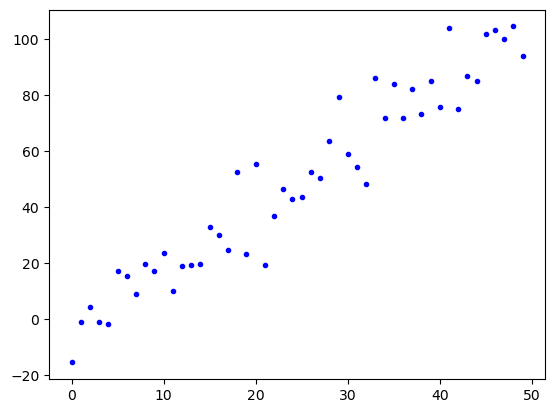

In [2]:
X = np.arange(50)
Y = (2 * X) + 10 * np.random.randn(50)
plt.plot(X, Y, 'b.')

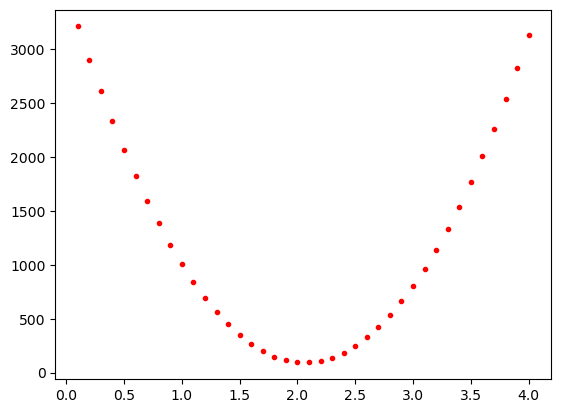

In [3]:
w_range = np.arange(0.1, 4.1, 0.1)
costs = []
for w in w_range:
    h = w * X
    cost = 1 / 50 * np.sum( (Y-h) ** 2)
    costs.append(cost)
plt.plot(w_range, costs, 'r.')

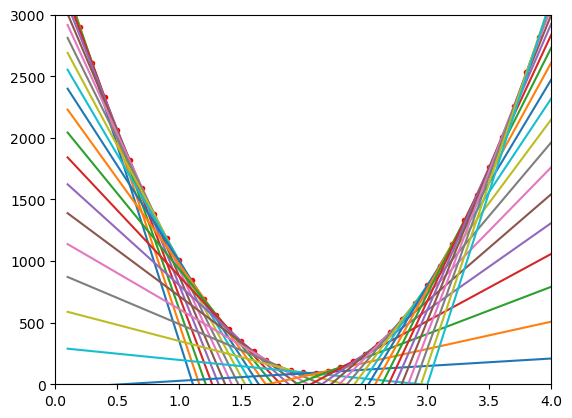

In [4]:
plt.plot(w_range, costs, 'r.')
for w, cost in zip(w_range, costs):
    h = w * X
    gradient = -2 / 50 * np.sum( (Y-h) * X)
    plt.plot(w_range, gradient*(w_range-w)+cost)
    plt.axis([0, 4, 0, 3000])
plt.show() 

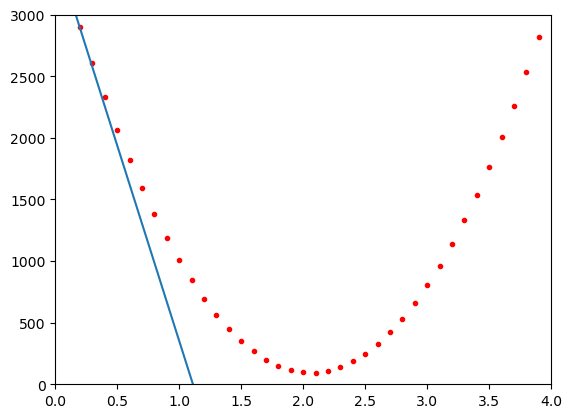

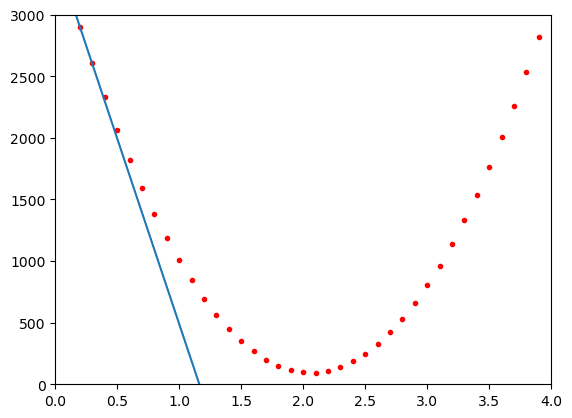

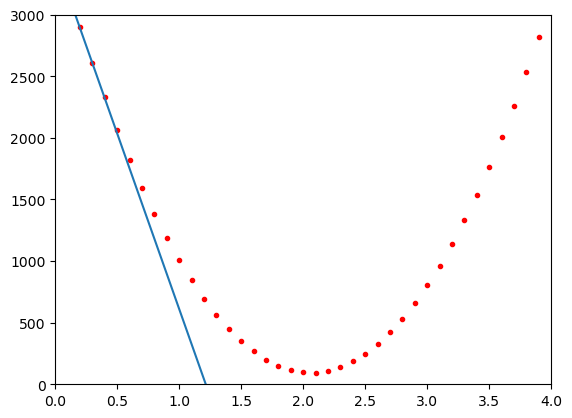

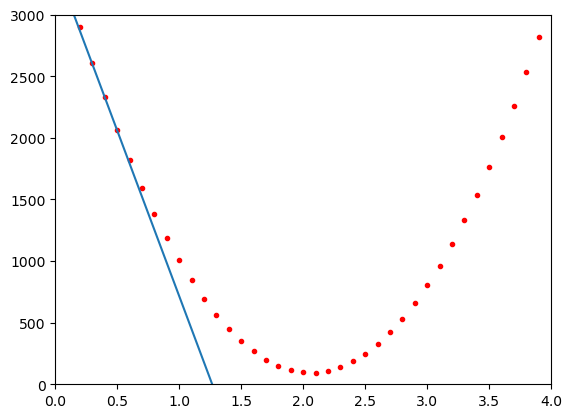

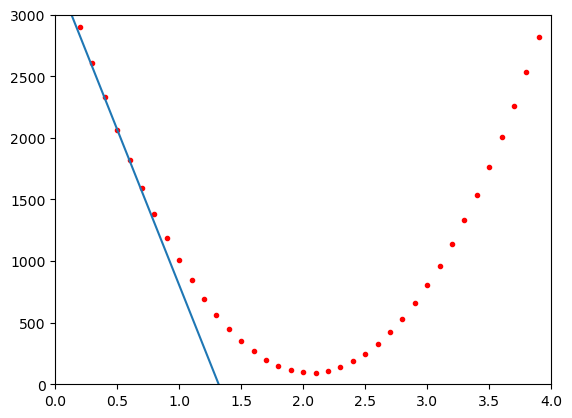

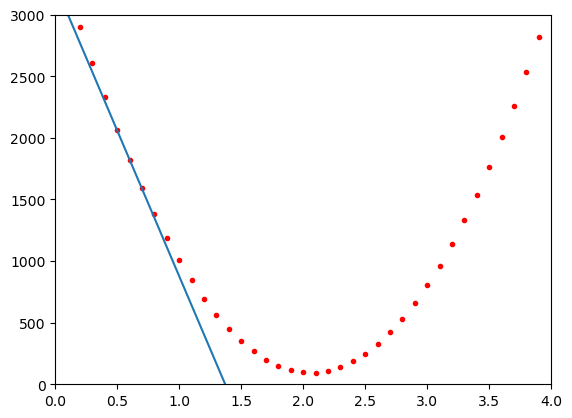

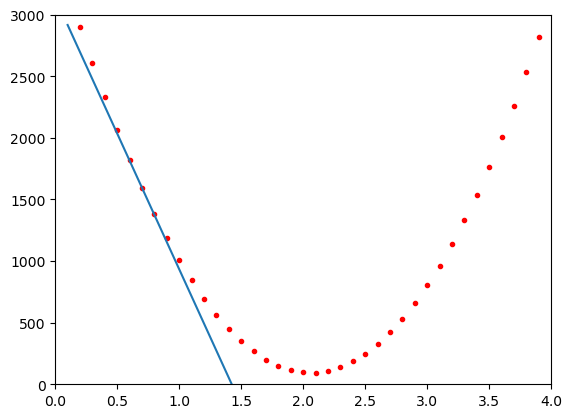

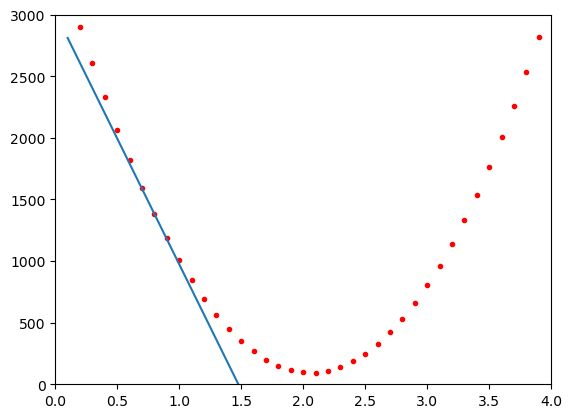

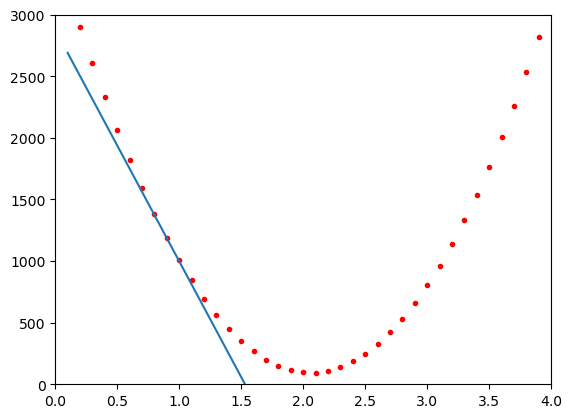

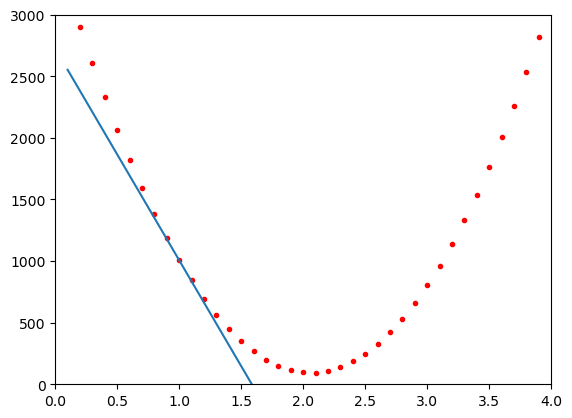

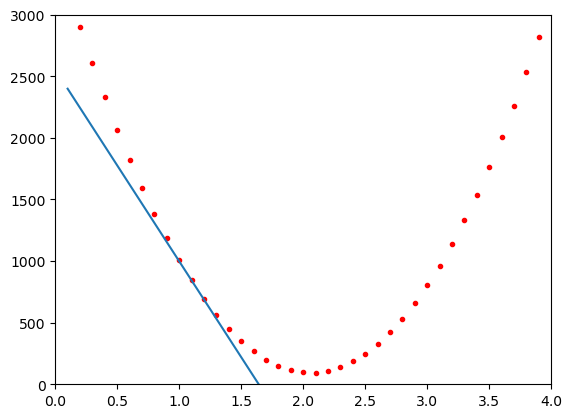

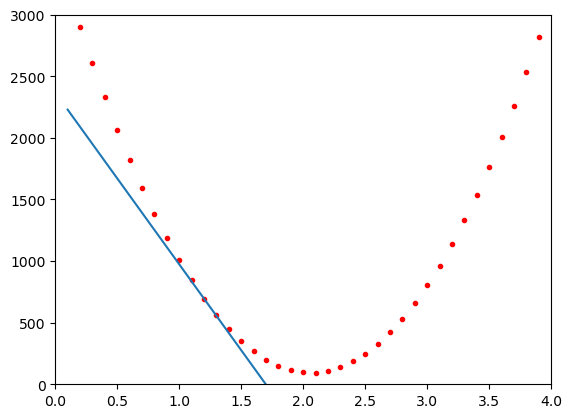

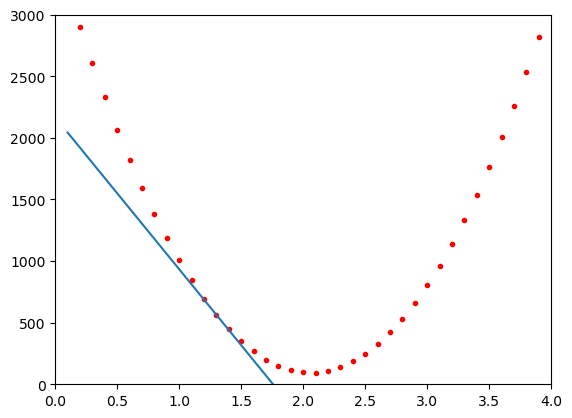

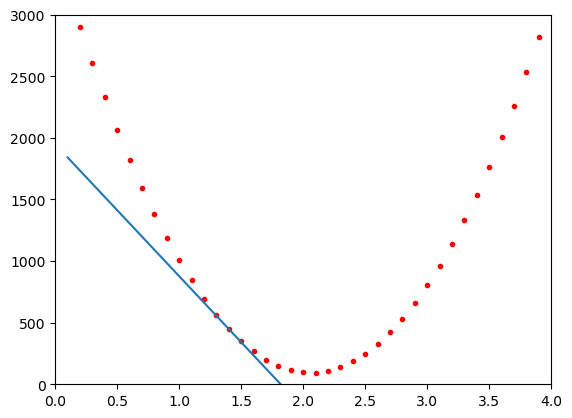

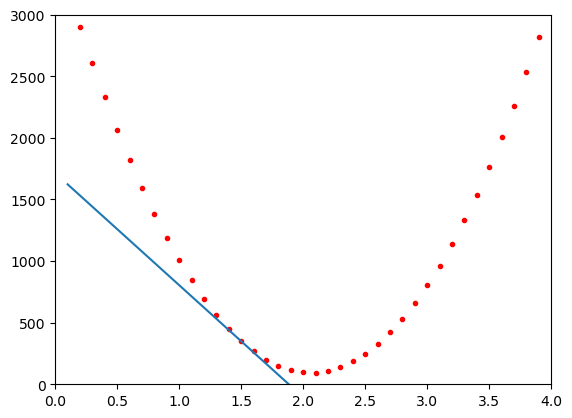

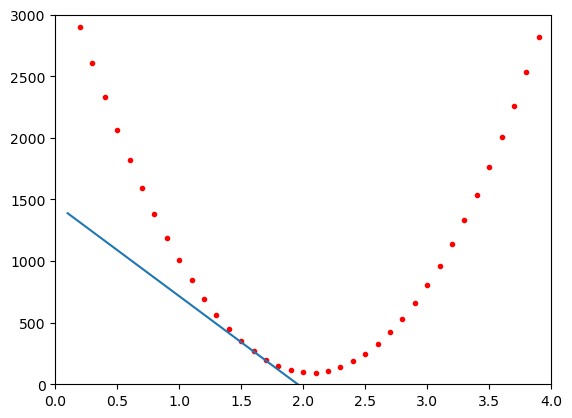

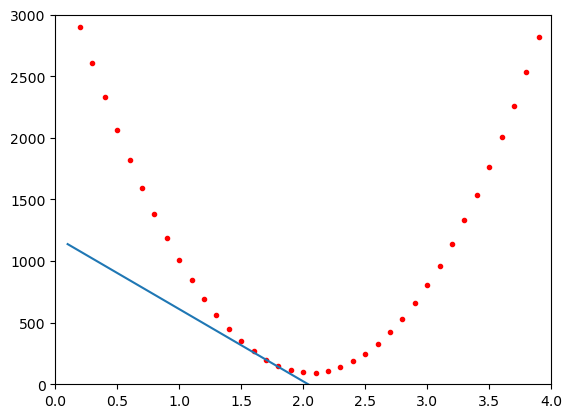

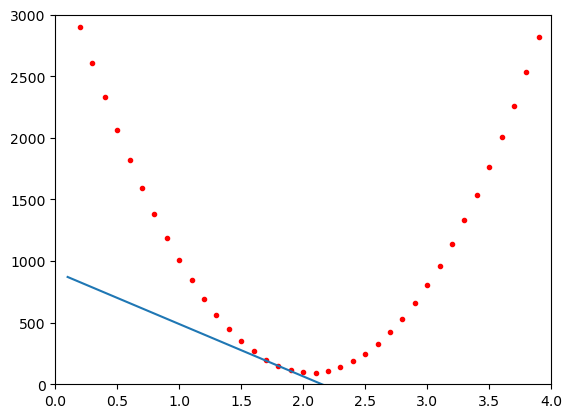

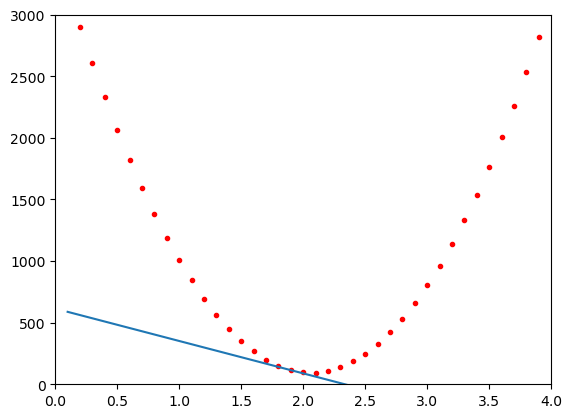

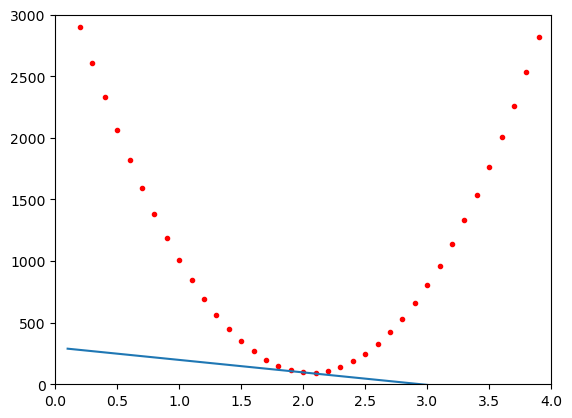

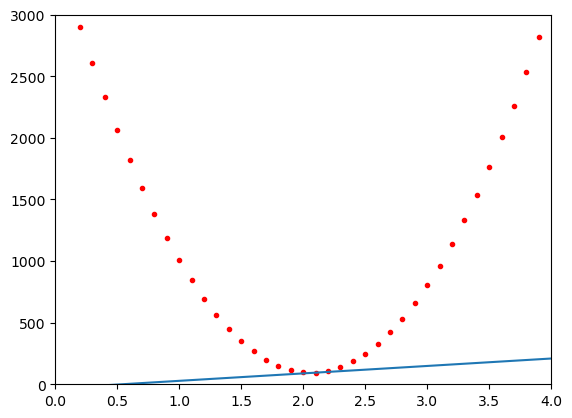

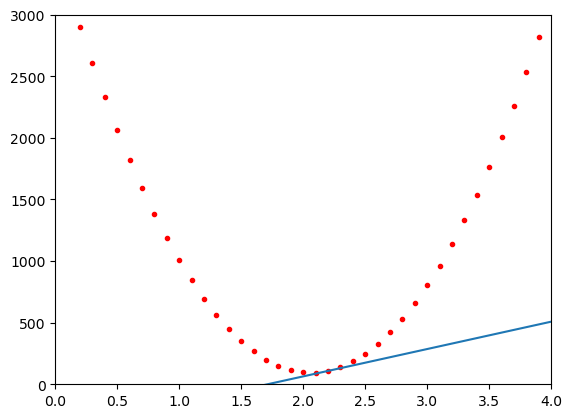

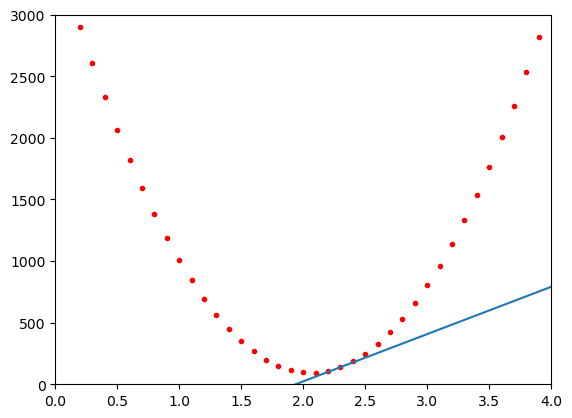

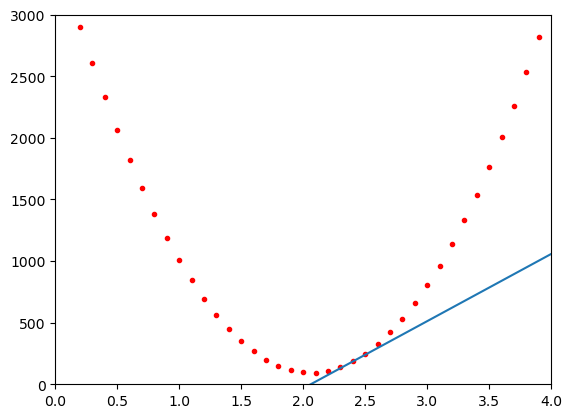

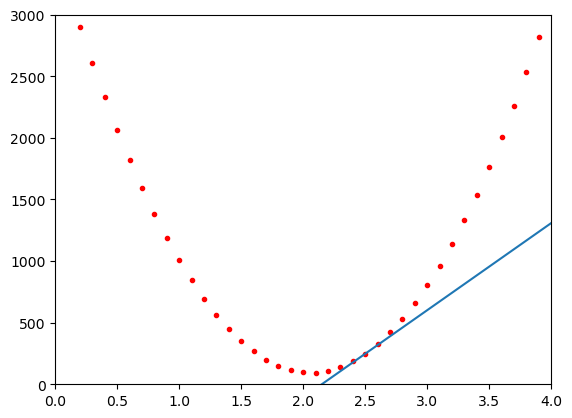

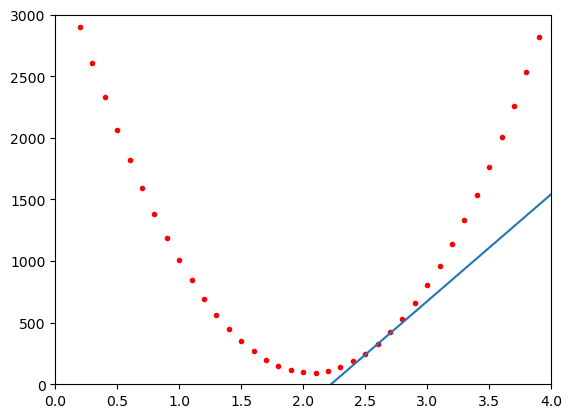

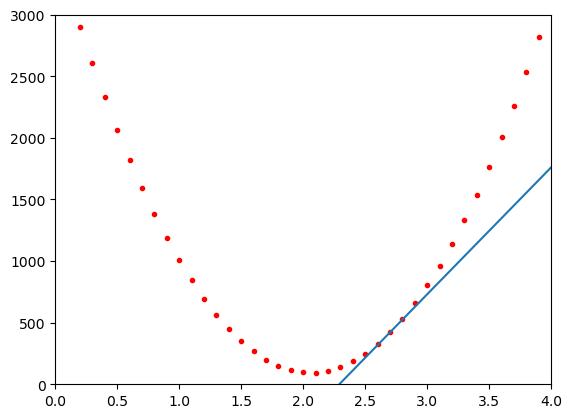

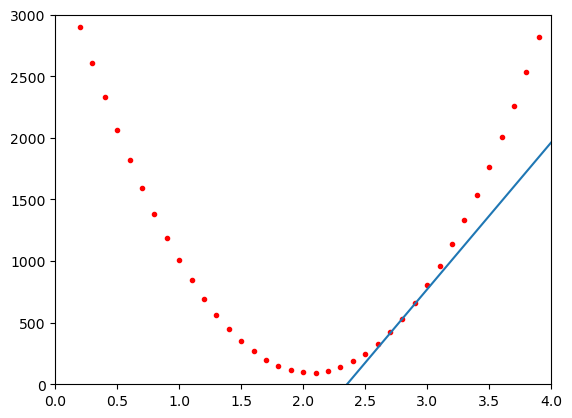

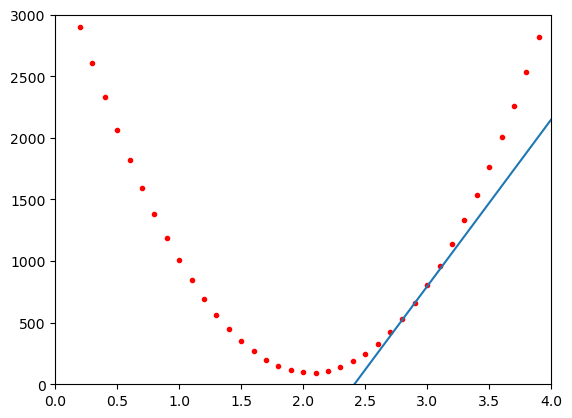

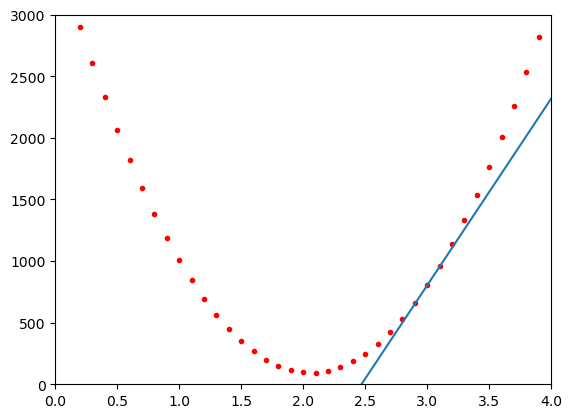

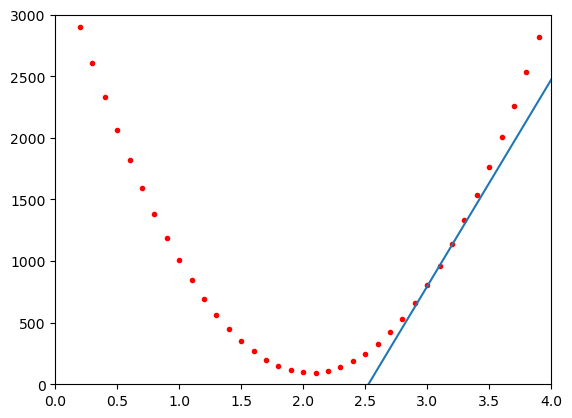

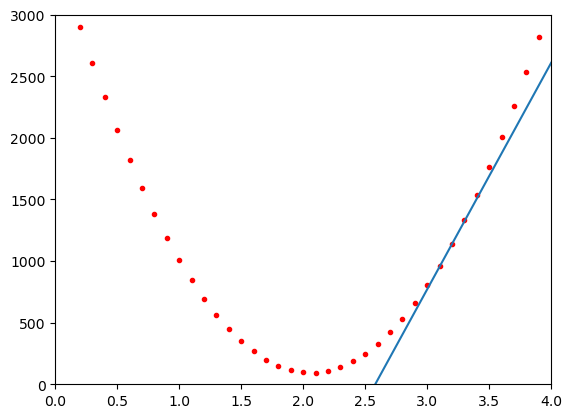

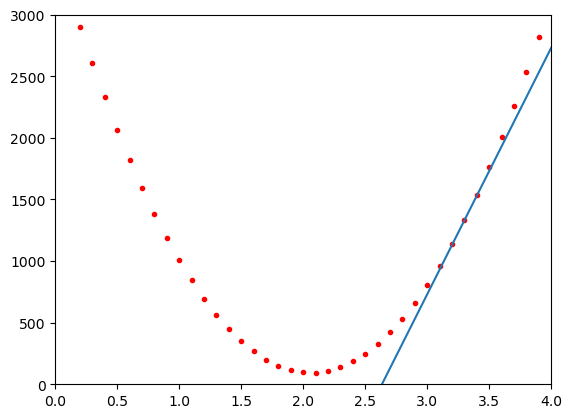

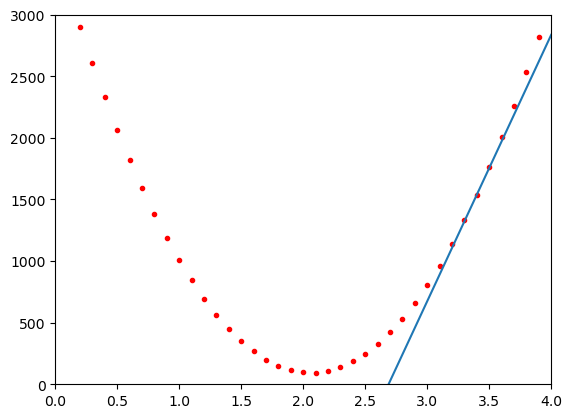

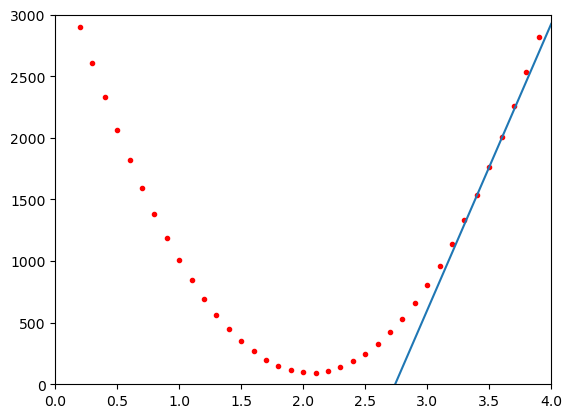

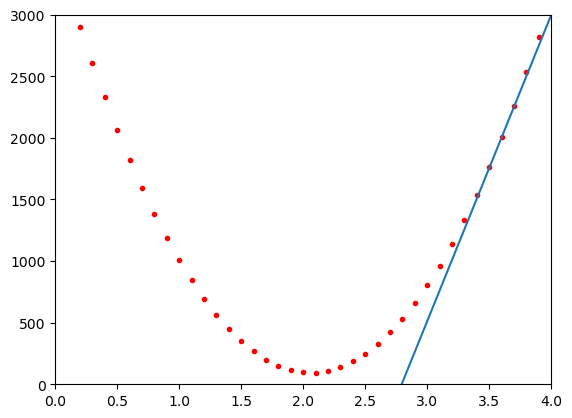

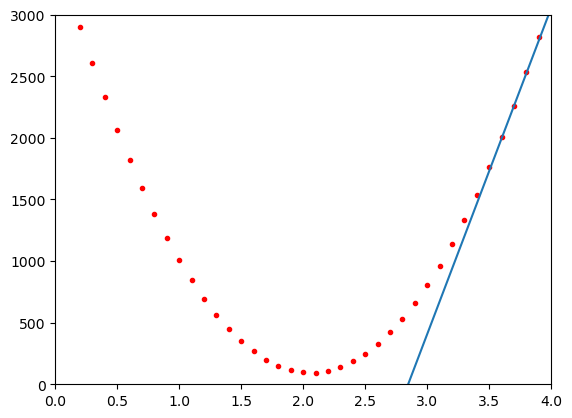

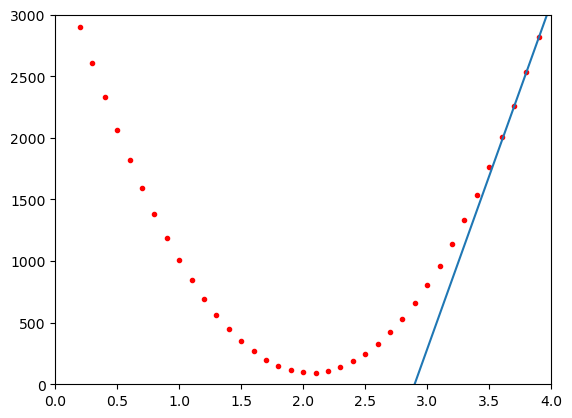

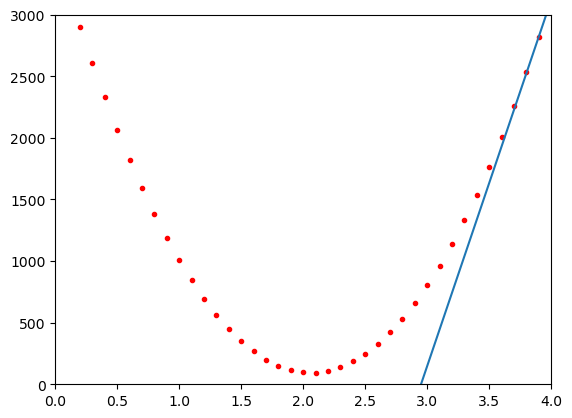

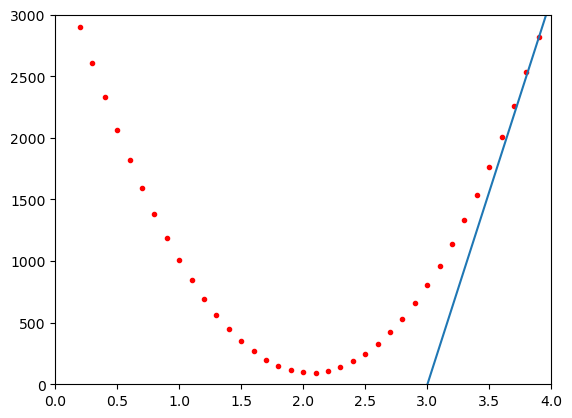

In [5]:
for w, cost in zip(w_range, costs):
    plt.plot(w_range, costs, 'r.')
    h = w * X
    gradient = -2 / 50 * np.sum( (Y-h) * X)
    plt.plot(w_range, gradient*(w_range-w)+cost)
    plt.axis([0, 4, 0, 3000])
    plt.show() 

# Torch Tensors

In [8]:
import torch

print(torch.__version__)

a = [1,2,3]
t1 = torch.Tensor(a)
t2 = torch.tensor(a)
t1, t2

2.0.1+cu118


(tensor([1., 2., 3.]), tensor([1, 2, 3]))

In [9]:
t = torch.FloatTensor([[1,2,3,4,]])
t

tensor([[1., 2., 3., 4.]])

In [10]:
t.dim()

2

In [11]:
t.size(), t.shape

(torch.Size([1, 4]), torch.Size([1, 4]))

In [12]:
torch.cuda.is_available()

True

In [13]:
t, t.to('cuda')

(tensor([[1., 2., 3., 4.]]), tensor([[1., 2., 3., 4.]], device='cuda:0'))

In [14]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1, 2], [3, 4]])
m1*m2

tensor([[ 1.,  4.],
        [ 9., 16.]])

In [15]:
m1+10

tensor([[11., 12.],
        [13., 14.]])

In [16]:
m1.view((2,2))

tensor([[1., 2.],
        [3., 4.]])

In [17]:
m1.reshape((2,2))

tensor([[1., 2.],
        [3., 4.]])

In [18]:
t = torch.FloatTensor(np.arange(9)).view(3, -1)
print(t)

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])


In [19]:
t[0]

tensor([0., 1., 2.])

In [20]:
t[1:3]

tensor([[3., 4., 5.],
        [6., 7., 8.]])

In [21]:
t[1:3, [-1, 0]]

tensor([[5., 3.],
        [8., 6.]])

In [22]:
t[(t%2==0)&(t>5)]

tensor([6., 8.])

In [23]:
t[:, t[2]%2==0]

tensor([[0., 2.],
        [3., 5.],
        [6., 8.]])

In [24]:
t.flip(dims=(0, ))

tensor([[6., 7., 8.],
        [3., 4., 5.],
        [0., 1., 2.]])

In [25]:
t.mean()

tensor(4.)

In [26]:
t.max(dim=0)

torch.return_types.max(
values=tensor([6., 7., 8.]),
indices=tensor([2, 2, 2]))

In [27]:
t.max(dim=0).values

tensor([6., 7., 8.])

In [28]:
t.max(dim=0).indices

tensor([2, 2, 2])

In [29]:
t.argmin(dim=1)

tensor([0, 0, 0])

In [30]:
t.shape, t.unsqueeze(1).shape

(torch.Size([3, 3]), torch.Size([3, 1, 3]))

In [31]:
tt = t.unsqueeze(1).unsqueeze(2)

In [32]:
tt.shape, tt.squeeze().shape

(torch.Size([3, 1, 1, 3]), torch.Size([3, 3]))

In [33]:
t.shape

torch.Size([3, 3])

In [34]:
t2 = torch.FloatTensor([1,2,3]).view(-1, 1)

In [35]:
t2

tensor([[1.],
        [2.],
        [3.]])

In [36]:
t.matmul(t2)

tensor([[ 8.],
        [26.],
        [44.]])

In [37]:
t.int()

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]], dtype=torch.int32)

# DNN

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('../data/boston.csv')
X = df.iloc[:, :-1]
Y = df['price']

SEED = 777
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, random_state=SEED)

In [45]:
import torch
from torch import nn
from torch import optim
from torchinfo import summary

torch.manual_seed(SEED)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [46]:
model = nn.Sequential(
    nn.Linear(X.shape[1], 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
).to(device)

In [47]:
model = nn.Sequential()
model.add_module('fc1', nn.Linear(X.shape[1], 32))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(32, 16))
model.add_module('relu2', nn.ReLU())
model.add_module('output', nn.Linear(16, 1))
model = model.to(device)

In [48]:
print(model)

Sequential(
  (fc1): Linear(in_features=13, out_features=32, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=16, out_features=1, bias=True)
)


In [49]:
summary(model)

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Linear: 1-1                            448
├─ReLU: 1-2                              --
├─Linear: 1-3                            528
├─ReLU: 1-4                              --
├─Linear: 1-5                            17
Total params: 993
Trainable params: 993
Non-trainable params: 0

In [50]:
class FullyConnectedNetwork(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)
        
        self.relu1 = nn.ReLU()
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.output(out)
        return out

In [51]:
model = FullyConnectedNetwork(X.shape[1]).to(device)

In [52]:
print(model)

FullyConnectedNetwork(
  (fc1): Linear(in_features=13, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=1, bias=True)
  (relu1): ReLU()
  (relu2): ReLU()
)


In [53]:
summary(model)

Layer (type:depth-idx)                   Param #
FullyConnectedNetwork                    --
├─Linear: 1-1                            448
├─Linear: 1-2                            528
├─Linear: 1-3                            17
├─ReLU: 1-4                              --
├─ReLU: 1-5                              --
Total params: 993
Trainable params: 993
Non-trainable params: 0

In [54]:
loss = nn.MSELoss().to(device)
loss

MSELoss()

In [55]:
optimizer = optim.Adam(model.parameters())
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [56]:
from torch.utils.data import Dataset
import numpy as np

class CustomDataset(Dataset):
    def __init__(self, x, y):
        super().__init__()
        self.data = np.array(x, dtype='float32')
        self.target = np.array(y, dtype='float32').reshape(-1, 1)

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx): 
        return self.data[idx], self.target[idx]

In [57]:
train_set = CustomDataset(x_train, y_train)
valid_set = CustomDataset(x_valid, y_valid)

In [58]:
from torch.utils.data import DataLoader

batch_size= 32

dataloader_train = DataLoader(dataset=train_set,
    batch_size=batch_size, shuffle=True, drop_last=False)
dataloader_valid = DataLoader(dataset=valid_set,
    batch_size=batch_size)

In [59]:
from tqdm import tqdm

epochs = 100 
results = {'Loss':[], 'Val_Loss':[]}

# 프로그레스 바 생성
progress_bar = tqdm(range(1, epochs+1))

for epoch in progress_bar:
    train_loss = 0
    valid_loss = 0
    
    n_samples_train = len(dataloader_train.dataset)
    n_samples_valid = len(dataloader_valid.dataset)

    model.train() # 학습 모드
    for x, y in dataloader_train:
        x, y = x.to(device), y.to(device)
        h = model(x) # 예측 값 생성
        cost = loss(h, y) # 비용 계산
        
        optimizer.zero_grad() # 누적 값 초기화
        cost.backward() # 역전파
        optimizer.step() # 파라미터 업데이트
        
        train_loss += (cost.item()*x.shape[0]/n_samples_train)
    results['Loss'].append(train_loss)
    
    model.eval() # 추론 모드
    with torch.no_grad(): # 자동 미분 off
        for x, y in dataloader_valid:
            x, y = x.to(device), y.to(device)
            h = model(x)
            cost = loss(h, y)

            valid_loss += (cost.item()*x.shape[0]/n_samples_valid)
    # 프로그레스 바 출력 메시지 업데이트
    progress_bar.set_postfix(Loss=f'{train_loss:10.5f}', 
                             Val_Loss=f'{valid_loss:10.5f}')
    results['Val_Loss'].append(valid_loss)

100%|██████████████████████████████████████████████| 100/100 [00:04<00:00, 24.04it/s, Loss=29.23376, Val_Loss=26.28028]


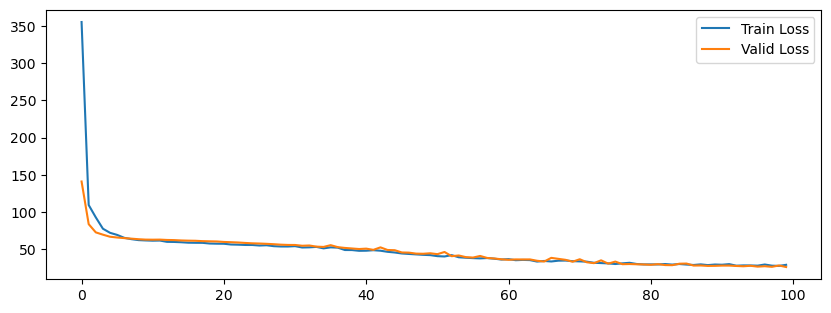

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3.5))
plt.plot(results['Loss'], label='Train Loss')
plt.plot(results['Val_Loss'], label='Valid Loss')
plt.legend()
plt.show()

In [61]:
pred = []

model.eval() # 추론 모드
with torch.no_grad(): # 자동 미분 off
    for x, y in dataloader_valid:
        x, y = x.to(device), y.to(device)
        h = model(x) # 예측 값 생성
        # 각 배치 별 예측 값 저장
        pred.append(h.detach().cpu().numpy())
pred = np.concatenate(pred) # 전체 배치 예측 통합

In [62]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

r2 = r2_score(y_valid, pred)
rmse = mean_squared_error(y_valid, pred, squared=False)
mae = mean_absolute_error(y_valid, pred)

print(f'{"R2 Score":8s}: {r2:.5f}')
print(f'{"RMSE":8s}: {rmse:.5f}')
print(f'{"MAE":8s}: {mae:.5f}')

R2 Score: 0.67472
RMSE    : 5.12643
MAE     : 3.82787


In [63]:
pip install torchmetrics

Note: you may need to restart the kernel to use updated packages.


In [64]:
pred = []

model.eval() # 추론 모드
with torch.no_grad(): # 자동 미분 off
    for x, y in dataloader_valid:
        x, y = x.to(device), y.to(device)
        h = model(x) # 예측 값 생성
        # 각 배치 별 예측 값 저장
        pred.append(h.detach().cpu())
pred = torch.cat(pred) # 전체 배치 예측 통합

In [65]:
from torchmetrics import MeanAbsoluteError

MeanAbsoluteError()(pred, torch.FloatTensor(y_valid.values).view(-1, 1))

C:\Users\Mana\anaconda3\Lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


tensor(3.8279)

In [66]:
import pandas as pd

df = pd.read_csv('../data/cancer.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [67]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [68]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train ,y_valid=  train_test_split(X, Y, stratify=Y, random_state=0)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((426, 30), (143, 30), (426,), (143,))

In [69]:
SEED = 1234
torch.manual_seed(SEED)

In [70]:
class BinaryClassifier(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 32)
        self.output = nn.Linear(32, 1)
        
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.relu(self.fc1(x))
        out = self.relu(self.fc2(out))
        out = self.sigmoid(self.output(out))
        return out

In [71]:
model = BinaryClassifier(x_train.shape[1]).to(device)
summary(model)

Layer (type:depth-idx)                   Param #
BinaryClassifier                         --
├─Linear: 1-1                            992
├─Linear: 1-2                            1,056
├─Linear: 1-3                            33
├─ReLU: 1-4                              --
├─Sigmoid: 1-5                           --
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0

In [72]:
loss = nn.BCELoss().to(device)
optimizer = optim.Adam(model.parameters())

In [73]:
from torch.utils.data import Dataset
import numpy as np

class CustomDataset(Dataset):
    def __init__(self, x, y):
        super().__init__()
        self.data = np.array(x, dtype='float32')
        self.target = np.array(y, dtype='float32').reshape(-1, 1)

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx): 
        return self.data[idx], self.target[idx]

In [74]:
train_set = CustomDataset(x_train ,y_train)
valid_set = CustomDataset(x_valid, y_valid)

In [75]:
from torch.utils.data import DataLoader

batch_size = 32

dataloader_train = DataLoader(dataset=train_set,batch_size=batch_size, 
                              shuffle=True, drop_last=True)
dataloader_valid = DataLoader(dataset=valid_set, batch_size=batch_size)

In [76]:
from tqdm import tqdm

epochs = 100 
results = {'Loss':[], 'Val_Loss':[]}

# 프로그레스 바 생성
progress_bar = tqdm(range(1, epochs+1))

for epoch in progress_bar:
    train_loss = 0
    valid_loss = 0
    
    n_samples_train = len(dataloader_train.dataset)
    n_samples_valid = len(dataloader_valid.dataset)

    model.train() # 학습 모드
    for x, y in dataloader_train:
        x, y = x.to(device), y.to(device)
        h = model(x) # 예측 값 생성
        cost = loss(h, y) # 비용 계산
        
        optimizer.zero_grad() # 누적 값 초기화
        cost.backward() # 역전파
        optimizer.step() # 파라미터 업데이트
        
        train_loss += (cost.item()*x.shape[0]/n_samples_train)
    results['Loss'].append(train_loss)
    
    model.eval() # 추론 모드
    with torch.no_grad(): # 자동 미분 off
        for x, y in dataloader_valid:
            x, y = x.to(device), y.to(device)
            h = model(x)
            cost = loss(h, y)

            valid_loss += (cost.item()*x.shape[0]/n_samples_valid)
    # 프로그레스 바 출력 메시지 업데이트
    progress_bar.set_postfix(Loss=f'{train_loss:10.5f}', 
                             Val_Loss=f'{valid_loss:10.5f}')
    results['Val_Loss'].append(valid_loss)

100%|████████████████████████████████████████████████| 100/100 [00:02<00:00, 44.05it/s, Loss=0.15105, Val_Loss=0.18164]


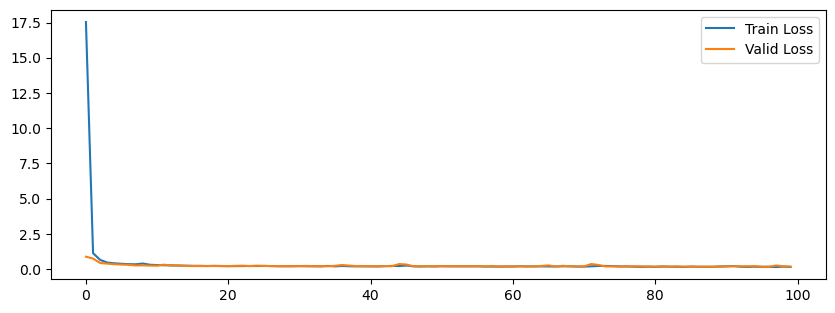

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3.5))
plt.plot(results['Loss'], label='Train Loss')
plt.plot(results['Val_Loss'], label='Valid Loss')
plt.legend()
plt.show()

In [78]:
pred = []

model.eval() # 추론 모드
with torch.no_grad(): # 자동 미분 off
    for x, y in dataloader_valid:
        x, y = x.to(device), y.to(device)
        h = model(x) # 예측 값 생성
        # 각 배치 별 예측 확률 저장
        pred.append(h.detach().cpu().numpy())
pred_p = np.concatenate(pred) # 전체 배치 예측 확률 통합
pred_p

array([[6.2320673e-01],
       [1.1114670e-04],
       [1.7862658e-04],
       [9.8438948e-01],
       [2.5834080e-03],
       [8.3926338e-01],
       [7.6584095e-12],
       [1.2908360e-07],
       [3.1681859e-03],
       [9.8171484e-01],
       [1.1270878e-04],
       [1.3877923e-04],
       [8.0766881e-01],
       [9.4798678e-01],
       [9.9004400e-01],
       [9.8819727e-01],
       [9.8357880e-01],
       [7.7114268e-03],
       [2.0254388e-01],
       [1.1697158e-03],
       [2.0794904e-01],
       [9.6038706e-09],
       [3.8476783e-01],
       [9.9363273e-01],
       [9.6238482e-01],
       [1.8491803e-02],
       [9.9085033e-01],
       [9.0188903e-01],
       [9.7039461e-01],
       [6.9466109e-06],
       [9.8741120e-01],
       [9.8530024e-01],
       [4.7606727e-01],
       [9.9477011e-01],
       [9.8563081e-01],
       [9.8268580e-01],
       [1.7840561e-03],
       [9.3751969e-06],
       [9.7057828e-06],
       [9.7491461e-01],
       [6.1685928e-06],
       [4.728255

In [79]:
pred_label = (pred_p>0.5).astype('int')

In [80]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import f1_score, roc_auc_score

accuracy = accuracy_score(y_valid, pred_label)
recall = recall_score(y_valid, pred_label, average='binary')
precision = precision_score(y_valid, pred_label, average='binary')
f1 = f1_score(y_valid, pred_label, average='binary')
auc = roc_auc_score(y_valid, pred_p)

print(f'{"Accuracy":10s}: {accuracy:.5f}')
print(f'{"Recall":10s}: {recall:.5f}')
print(f'{"Precision":10s}: {precision:.5f}')
print(f'{"F1 Score":10s}: {f1:.5f}')
print(f'{"AUC":10s}: {auc:.5f}')

Accuracy  : 0.92308
Recall    : 0.93333
Precision : 0.94382
F1 Score  : 0.93855
AUC       : 0.97820


In [82]:
from torchvision import datasets, transforms

train_set = datasets.MNIST(root='./data/mnist/',
                           train=True,
                           download=True,
                           transform=transforms.ToTensor())
valid_set = datasets.MNIST(root='./data/mnist/',
                           train=False,
                           download=True,
                           transform=transforms.ToTensor())

x, y = train_set[0]
x.shape, len(train_set), len(valid_set)

100%|██████████████████████████████████████████████████████████████████| 9912422/9912422 [00:00<00:00, 19417059.75it/s]


Extracting ./data/mnist/MNIST\raw\train-images-idx3-ubyte.gz to ./data/mnist/MNIST\raw



100%|████████████████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<?, ?it/s]


Extracting ./data/mnist/MNIST\raw\train-labels-idx1-ubyte.gz to ./data/mnist/MNIST\raw



100%|██████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 14340378.66it/s]


Extracting ./data/mnist/MNIST\raw\t10k-images-idx3-ubyte.gz to ./data/mnist/MNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<?, ?it/s]

Extracting ./data/mnist/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/mnist/MNIST\raw



(torch.Size([1, 28, 28]), 60000, 10000)

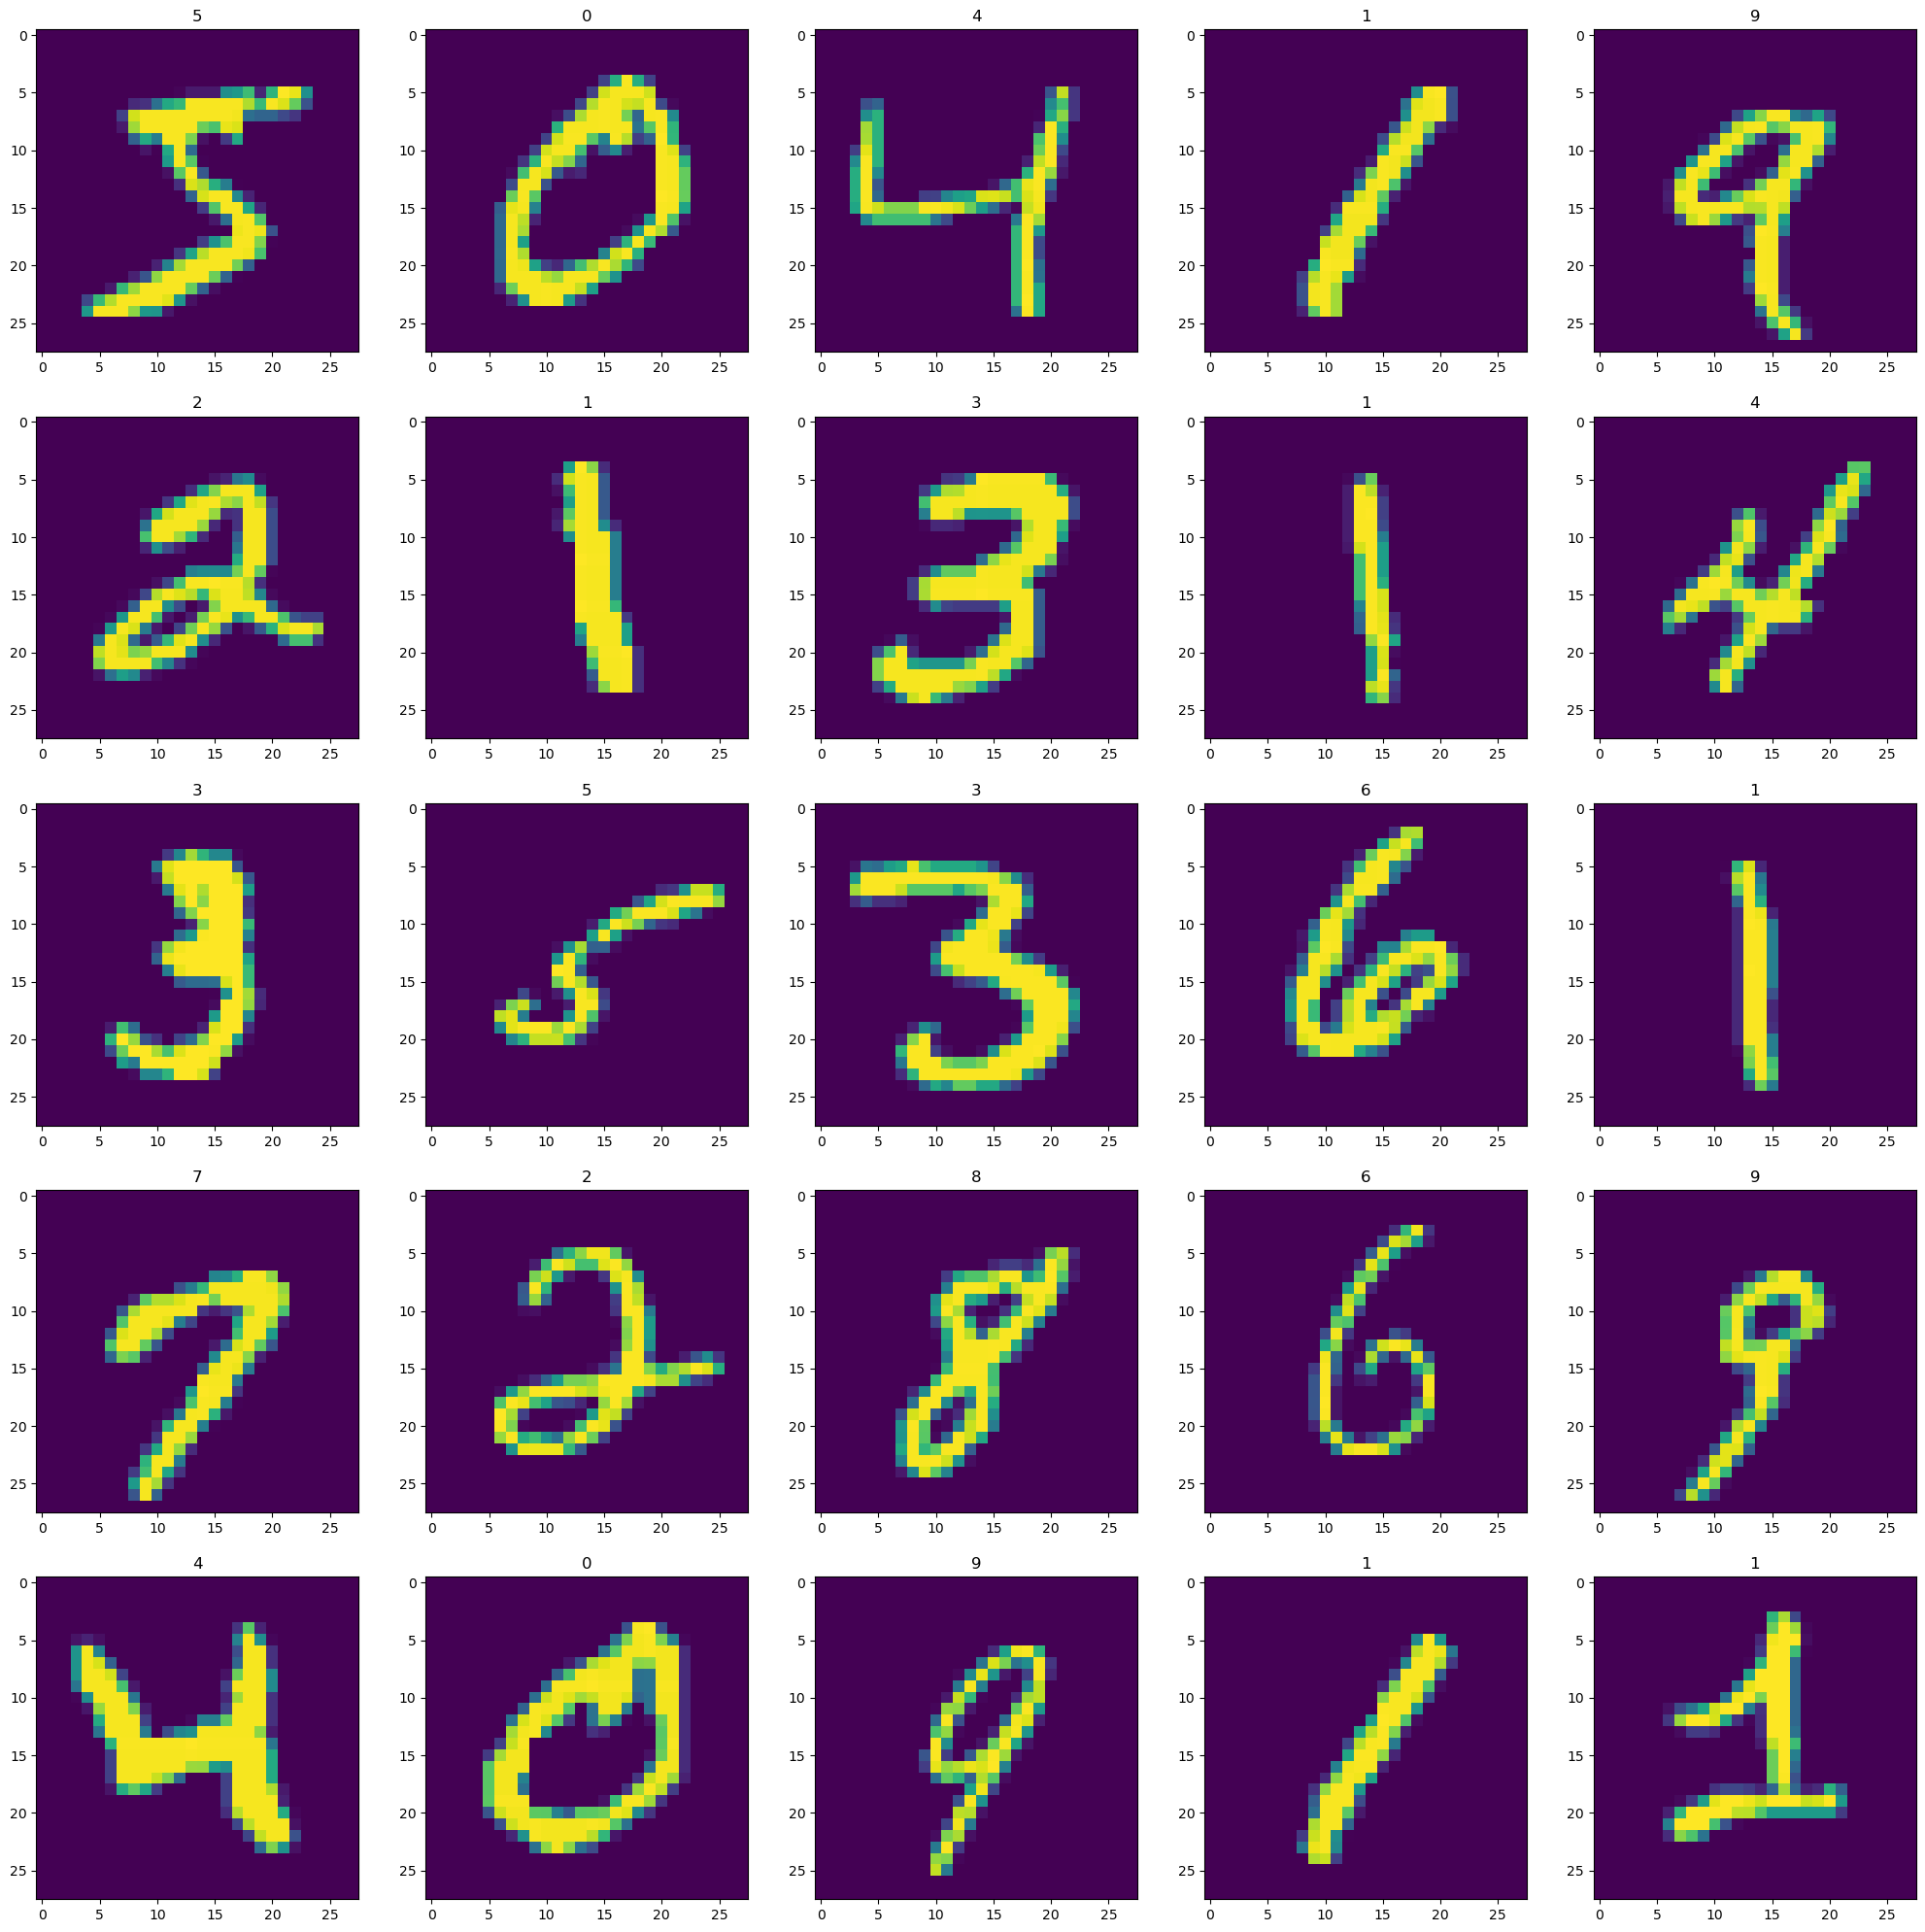

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 25))

for i in range(25):
    x, y = train_set[i]
    plt.subplot(5,5,i+1)
    plt.imshow(x.squeeze())
    plt.title(y)
plt.show()

In [84]:
from torch.utils.data import DataLoader

SEED = 1234
torch.manual_seed(SEED)

batch_size = 32

dataloader_train = DataLoader(dataset=train_set,batch_size=batch_size, 
                              shuffle=True, drop_last=True, 
                              num_workers=2, persistent_workers=True, pin_memory=True)
dataloader_valid = DataLoader(dataset=valid_set, batch_size=batch_size, 
                              num_workers=2, persistent_workers=True, pin_memory=True)

In [85]:
class MultiClassClassifier(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 32)
        self.output = nn.Linear(32, 10)
        
        self.relu = nn.ReLU()
        
    def forward(self, x):
        out = self.relu(self.fc1(x))
        out = self.relu(self.fc2(out))
        out = self.output(out)
        return out

In [86]:
x, y = train_set[0]
input_size = x.shape[1]*x.shape[2] # n_features
model = MultiClassClassifier(input_size).to(device)

In [87]:
summary(model)

Layer (type:depth-idx)                   Param #
MultiClassClassifier                     --
├─Linear: 1-1                            25,120
├─Linear: 1-2                            1,056
├─Linear: 1-3                            330
├─ReLU: 1-4                              --
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0

In [88]:
loss = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters())

In [89]:
from tqdm import tqdm

epochs = 100
results = {'Loss':[], 'Val_Loss':[]}

# 프로그레스 바 생성
progress_bar = tqdm(range(1, epochs+1))

for epoch in progress_bar:
    train_loss = 0
    valid_loss = 0
    
    n_sampels_train = len(dataloader_train.dataset)
    n_sampels_valid = len(dataloader_valid.dataset)
    
    model.train() # 학습 모드
    for x, y in dataloader_train:
        # 4D Tensor를 FC에 넣기 위해 2D Tensor로 형태 변경
        x, y = x.view(-1, input_size).to(device), y.to(device)
        h = model(x) # 예측 값 생성
        cost = loss(h, y) # 비용 계산
        
        optimizer.zero_grad() # 누적 값 초기화
        cost.backward() # 역전파
        optimizer.step() # 파라미터 업데이트
        
        train_loss += (cost*x.shape[0]/n_sampels_train)
    results['Loss'].append(train_loss)
    
    model.eval() # 추론 모드
    with torch.no_grad(): # 자동 미분 off
        for x, y in dataloader_valid:
            x, y = x.view(-1, input_size).to(device), y.to(device)
            h = model(x)
            cost = loss(h, y)

            valid_loss += (cost*x.shape[0]/n_sampels_valid)
    # 프로그레스 바 출력 메시지 업데이트
    progress_bar.set_postfix(Loss=f'{train_loss:10.5f}', 
                             Val_Loss=f'{valid_loss:10.5f}')
    results['Val_Loss'].append(valid_loss)

 21%|██████████▎                                      | 21/100 [01:34<05:56,  4.51s/it, Loss=0.03579, Val_Loss=0.14240]


KeyboardInterrupt: 

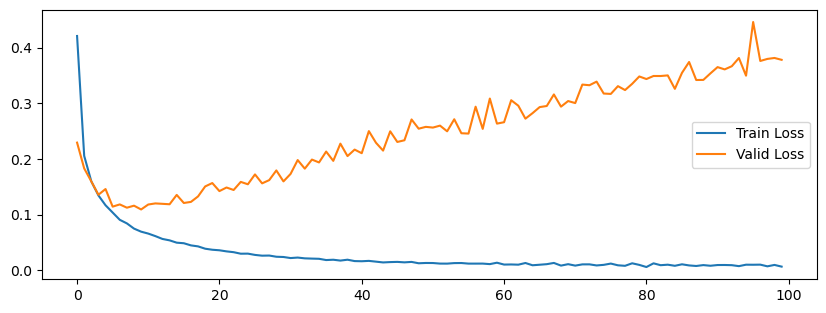

In [204]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3.5))
plt.plot(results['Loss'], label='Train Loss')
plt.plot(results['Val_Loss'], label='Valid Loss')
plt.legend()
plt.show()

In [213]:
from torch.nn import functional as F

pred = []

model.eval() # 추론 모드
with torch.no_grad(): # 자동 미분 off
    for x, y in dataloader_valid:
        x, y = x.view(-1, input_size).to(device), y.to(device)
        h = model(x) # 출력 값 생성
        pred.append(F.softmax(h, dim=1).argmax(dim=1).detach().cpu().numpy())
pred = np.concatenate(pred) # 전체 배치 예측 확률 통합
pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [214]:
from sklearn.metrics import classification_report

report = classification_report(dataloader_valid.dataset.targets, pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.95      0.97      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.96      0.95      0.96       892
           6       0.97      0.96      0.96       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.94      0.95       974
           9       0.95      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.96      0.96     10000
weighted avg       0.97      0.97      0.97     10000



In [90]:
import pandas as pd

df = pd.read_csv('../data/reuters.csv')

In [91]:
df['tokens'] = df['tokens'].str.split(',')
df['tokens'] = df['tokens'].apply(lambda x: [int(item) for item in x])

In [92]:
df['tokens']

0        [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, ...
1        [1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56,...
2        [1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32,...
3        [1, 4, 686, 867, 558, 4, 37, 38, 309, 2276, 46...
4        [1, 8295, 111, 8, 25, 166, 40, 638, 10, 436, 2...
                               ...                        
11223    [1, 56, 2459, 1943, 3620, 81, 8, 16, 731, 10, ...
11224    [1, 53, 46, 425, 26, 14, 74, 119, 26, 39, 46, ...
11225    [1, 1809, 124, 53, 653, 26, 39, 5439, 18, 14, ...
11226    [1, 5586, 2, 71, 8, 23, 166, 344, 10, 78, 13, ...
11227    [1, 706, 209, 658, 4, 37, 38, 309, 484, 4, 143...
Name: tokens, Length: 11228, dtype: object

In [93]:
n_splits = int(len(df)*0.8)
train = df[:n_splits]
valid = df[n_splits:]
x_train, y_train = train['tokens'].values, train['label'].values
x_valid, y_valid = valid['tokens'].values, valid['label'].values

In [94]:
len(train['tokens'][0]), len(train['tokens'][1])

(87, 56)

In [95]:
import numpy as np

def vectorezie_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train_v = vectorezie_sequence(x_train)
x_valid_v = vectorezie_sequence(x_valid)
x_valid_v.shape, x_valid_v.shape

((2246, 10000), (2246, 10000))

In [96]:
from torch.utils.data import Dataset
import numpy as np

class CustomDataset(Dataset):
    def __init__(self, x, y):
        super().__init__()
        self.data = np.array(x, dtype='float32')
        self.target = np.array(y)

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx], self.target[idx]

In [97]:
train_set = CustomDataset(x_train_v, y_train)
valid_set = CustomDataset(x_valid_v, y_valid)

In [98]:
x_train_v.shape

(8982, 10000)

In [99]:
from torch.utils.data import DataLoader

SEED = 1234
torch.manual_seed(SEED)

batch_size = 512

dataloader_train = DataLoader(dataset=train_set,batch_size=batch_size,
                              shuffle=True)
dataloader_valid = DataLoader(dataset=valid_set,batch_size=batch_size)

In [100]:
class MultiClassClassifier(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.output = nn.Linear(hidden_size, 46)
        
        self.relu = nn.ReLU()
        
    def forward(self, x):
        out = self.relu(self.fc1(x))
        out = self.relu(self.fc2(out))
        out = self.output(out)
        return out

In [101]:
input_size = 10000
hidden_size = 64
model = MultiClassClassifier(input_size, hidden_size).to(device)

In [102]:
summary(model)

Layer (type:depth-idx)                   Param #
MultiClassClassifier                     --
├─Linear: 1-1                            640,064
├─Linear: 1-2                            4,160
├─Linear: 1-3                            2,990
├─ReLU: 1-4                              --
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0

In [103]:
loss = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters())

In [104]:
from tqdm import tqdm

epochs = 20
results = {'Loss':[], 'Val_Loss':[]}

# 프로그레스 바 생성
progress_bar = tqdm(range(1, epochs+1))

for epoch in progress_bar:
    train_loss = 0
    valid_loss = 0
    
    n_samples_train = len(dataloader_train.dataset)
    n_samples_valid = len(dataloader_valid.dataset)
    
    model.train() # 학습 모드
    for x, y in dataloader_train:
        # 4D Tensor를 FC에 넣기 위해 2D Tensor로 형태 변경
        x = x.view(-1, input_size).to(device)
        y = y.to(device)
        h = model(x) # 예측 값 생성
        cost = loss(h, y) # 비용 계산
        
        optimizer.zero_grad() # 누적 값 초기화
        cost.backward() # 역전파
        optimizer.step() # 파라미터 업데이트
        
        train_loss += (cost*x.shape[0]/n_samples_train)
    results['Loss'].append(train_loss)
    
    model.eval() # 추론 모드
    with torch.no_grad(): # 자동 미분 off
        for x, y in dataloader_valid:
            x = x.view(-1, input_size).to(device)
            y = y.to(device)
            h = model(x)
            cost = loss(h, y)

            valid_loss += (cost*x.shape[0]/n_samples_valid)
    # 프로그레스 바 출력 메시지 업데이트
    progress_bar.set_postfix(Loss=f'{train_loss:10.5f}', 
                             Val_Loss=f'{valid_loss:10.5f}')
    results['Val_Loss'].append(valid_loss)

100%|██████████████████████████████████████████████████| 20/20 [00:06<00:00,  2.98it/s, Loss=0.12602, Val_Loss=1.10948]


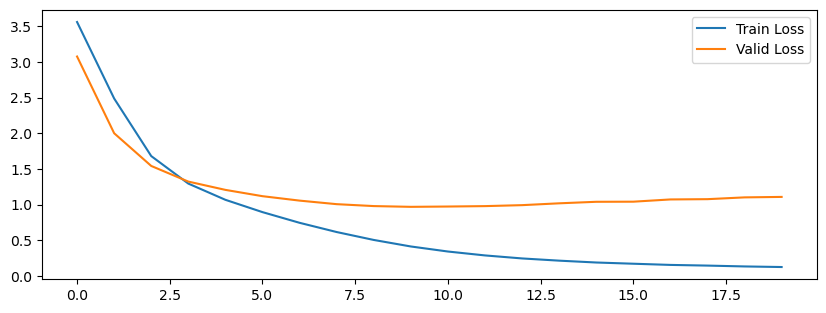

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3.5))
plt.plot([data.detach().cpu() for data in results['Loss']], label='Train Loss')
plt.plot([data.detach().cpu() for data in results['Val_Loss']], label='Valid Loss')
plt.legend()
plt.show()

In [106]:
from torch.nn import functional as F

pred = []

model.eval() # 추론 모드
with torch.no_grad(): # 자동 미분 off
    for x, y in dataloader_valid:
        x, y = x.view(-1, input_size).to(device), y.to(device)
        h = model(x) # 출력 값 생성
        pred.append(F.softmax(h, dim=1).argmax(dim=1).detach().cpu().numpy())
pred = np.concatenate(pred) # 전체 배치 예측 확률 통합
pred

array([ 3, 10,  1, ...,  3,  4, 24], dtype=int64)

In [107]:
from sklearn.metrics import classification_report

report = classification_report(dataloader_valid.dataset.target, pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.75      0.79      0.77       105
           2       0.80      0.60      0.69        20
           3       0.93      0.92      0.93       813
           4       0.79      0.89      0.84       474
           5       0.50      0.20      0.29         5
           6       0.87      0.93      0.90        14
           7       1.00      0.33      0.50         3
           8       0.62      0.76      0.68        38
           9       0.74      0.68      0.71        25
          10       0.83      0.83      0.83        30
          11       0.62      0.78      0.70        83
          12       0.50      0.31      0.38        13
          13       0.62      0.62      0.62        37
          14       0.20      0.50      0.29         2
          15       0.50      0.22      0.31         9
          16       0.68      0.76      0.72        99
          17       0.50    

In [113]:
input_size = 10000
hidden_size = 16
model = MultiClassClassifier(input_size, hidden_size).to(device)

In [114]:
loss = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters())

In [115]:
from tqdm import tqdm

epochs = 20
results = {'Loss':[], 'Val_Loss':[]}

# 프로그레스 바 생성
progress_bar = tqdm(range(1, epochs+1))

for epoch in progress_bar:
    train_loss = 0
    valid_loss = 0
    
    n_samples_train = len(dataloader_train.dataset)
    n_samples_valid = len(dataloader_valid.dataset)
    
    model.train() # 학습 모드
    for x, y in dataloader_train:
        # 4D Tensor를 FC에 넣기 위해 2D Tensor로 형태 변경
        x = x.view(-1, input_size).to(device)
        y = y.to(device)
        h = model(x) # 예측 값 생성
        cost = loss(h, y) # 비용 계산
        
        optimizer.zero_grad() # 누적 값 초기화
        cost.backward() # 역전파
        optimizer.step() # 파라미터 업데이트
        
        train_loss += (cost*x.shape[0]/n_samples_train)
    results['Loss'].append(train_loss.item())
    
    model.eval() # 추론 모드
    with torch.no_grad(): # 자동 미분 off
        for x, y in dataloader_valid:
            x = x.view(-1, input_size).to(device)
            y = y.to(device)
            h = model(x)
            cost = loss(h, y)

            valid_loss += (cost*x.shape[0]/n_samples_valid)
    # 프로그레스 바 출력 메시지 업데이트
    progress_bar.set_postfix(Loss=f'{train_loss:10.5f}', 
                             Val_Loss=f'{valid_loss:10.5f}')
    results['Val_Loss'].append(valid_loss.item())

100%|██████████████████████████████████████████████████| 20/20 [00:06<00:00,  2.99it/s, Loss=0.40655, Val_Loss=1.01168]


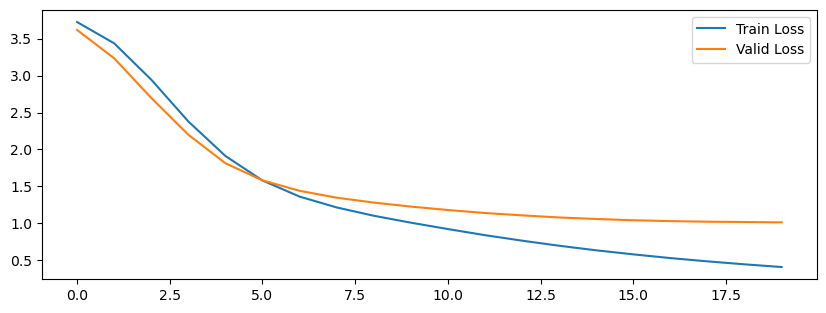

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3.5))
plt.plot(results['Loss'], label='Train Loss')
plt.plot(results['Val_Loss'], label='Valid Loss')
plt.legend()
plt.show()

In [117]:
from torch.nn import functional as F

pred = []

model.eval() # 추론 모드
with torch.no_grad(): # 자동 미분 off
    for x, y in dataloader_valid:
        x, y = x.view(-1, input_size).to(device), y.to(device)
        h = model(x) # 출력 값 생성
        pred.append(F.softmax(h, dim=1).argmax(dim=1).detach().cpu().numpy())
pred = np.concatenate(pred) # 전체 배치 예측 확률 통합
pred

array([ 3, 10,  1, ...,  3,  3, 11], dtype=int64)

In [118]:
from sklearn.metrics import classification_report

report = classification_report(dataloader_valid.dataset.target, pred)
print(report)

              precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.65      0.82      0.72       105
           2       0.46      0.65      0.54        20
           3       0.91      0.95      0.93       813
           4       0.83      0.88      0.86       474
           5       0.00      0.00      0.00         5
           6       1.00      0.93      0.96        14
           7       0.00      0.00      0.00         3
           8       0.62      0.66      0.64        38
           9       0.87      0.80      0.83        25
          10       0.88      0.73      0.80        30
          11       0.61      0.80      0.69        83
          12       0.33      0.08      0.12        13
          13       0.50      0.59      0.54        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9
          16       0.68      0.75      0.71        99
          17       0.00    

C:\Users\Mana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
input_size = 10000
hidden_size = 6
model = MultiClassClassifier(input_size, hidden_size).to(device)

In [120]:
loss = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters())

In [121]:
from tqdm import tqdm

epochs = 20
results = {'Loss':[], 'Val_Loss':[]}

# 프로그레스 바 생성
progress_bar = tqdm(range(1, epochs+1))

for epoch in progress_bar:
    train_loss = 0
    valid_loss = 0
    
    n_samples_train = len(dataloader_train.dataset)
    n_samples_valid = len(dataloader_valid.dataset)
    
    model.train() # 학습 모드
    for x, y in dataloader_train:
        # 4D Tensor를 FC에 넣기 위해 2D Tensor로 형태 변경
        x = x.view(-1, input_size).to(device)
        y = y.to(device)
        h = model(x) # 예측 값 생성
        cost = loss(h, y) # 비용 계산
        
        optimizer.zero_grad() # 누적 값 초기화
        cost.backward() # 역전파
        optimizer.step() # 파라미터 업데이트
        
        train_loss += (cost*x.shape[0]/n_samples_train)
    results['Loss'].append(train_loss.item())
    
    model.eval() # 추론 모드
    with torch.no_grad(): # 자동 미분 off
        for x, y in dataloader_valid:
            x = x.view(-1, input_size).to(device)
            y = y.to(device)
            h = model(x)
            cost = loss(h, y)

            valid_loss += (cost*x.shape[0]/n_samples_valid)
    # 프로그레스 바 출력 메시지 업데이트
    progress_bar.set_postfix(Loss=f'{train_loss:10.5f}', 
                             Val_Loss=f'{valid_loss:10.5f}')
    results['Val_Loss'].append(valid_loss.item())

100%|██████████████████████████████████████████████████| 20/20 [00:06<00:00,  2.94it/s, Loss=1.19300, Val_Loss=1.44779]


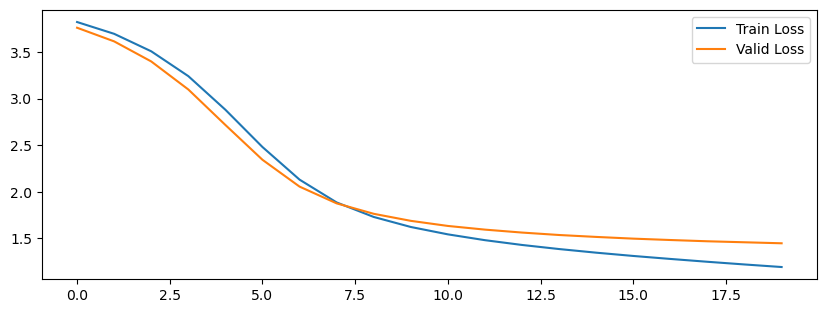

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3.5))
plt.plot(results['Loss'], label='Train Loss')
plt.plot(results['Val_Loss'], label='Valid Loss')
plt.legend()
plt.show()

In [123]:
from torch.nn import functional as F

pred = []

model.eval() # 추론 모드
with torch.no_grad(): # 자동 미분 off
    for x, y in dataloader_valid:
        x, y = x.view(-1, input_size).to(device), y.to(device)
        h = model(x) # 출력 값 생성
        pred.append(F.softmax(h, dim=1).argmax(dim=1).detach().cpu().numpy())
pred = np.concatenate(pred) # 전체 배치 예측 확률 통합
pred

array([ 3,  1,  1, ...,  3,  4, 16], dtype=int64)

In [124]:
from sklearn.metrics import classification_report

report = classification_report(dataloader_valid.dataset.target, pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.51      0.54      0.53       105
           2       0.00      0.00      0.00        20
           3       0.83      0.94      0.88       813
           4       0.69      0.90      0.78       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.43      0.60      0.50        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.53      0.64      0.58        99
          17       0.00    

C:\Users\Mana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [128]:
input_size = 10000
hidden_size = 1024
model = MultiClassClassifier(input_size, hidden_size).to(device)

In [129]:
loss = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters())

In [130]:
from tqdm import tqdm

epochs = 20
results = {'Loss':[], 'Val_Loss':[]}

# 프로그레스 바 생성
progress_bar = tqdm(range(1, epochs+1))

for epoch in progress_bar:
    train_loss = 0
    valid_loss = 0
    
    n_samples_train = len(dataloader_train.dataset)
    n_samples_valid = len(dataloader_valid.dataset)
    
    model.train() # 학습 모드
    for x, y in dataloader_train:
        # 4D Tensor를 FC에 넣기 위해 2D Tensor로 형태 변경
        x, y = x.view(-1, input_size).to(device), y.to(device)
        h = model(x) # 예측 값 생성
        cost = loss(h, y) # 비용 계산
        
        optimizer.zero_grad() # 누적 값 초기화
        cost.backward() # 역전파
        optimizer.step() # 파라미터 업데이트
        
        train_loss += (cost.item()*x.shape[0]/n_samples_train)
    results['Loss'].append(train_loss)
    
    model.eval() # 추론 모드
    with torch.no_grad(): # 자동 미분 off
        for x, y in dataloader_valid:
            x, y = x.view(-1, input_size).to(device), y.to(device)
            h = model(x)
            cost = loss(h, y)

            valid_loss += (cost.item()*x.shape[0]/n_samples_valid)
    # 프로그레스 바 출력 메시지 업데이트
    progress_bar.set_postfix(Loss=f'{train_loss:10.5f}', 
                             Val_Loss=f'{valid_loss:10.5f}')
    results['Val_Loss'].append(valid_loss)

100%|██████████████████████████████████████████████████| 20/20 [00:06<00:00,  3.11it/s, Loss=0.08411, Val_Loss=1.16160]


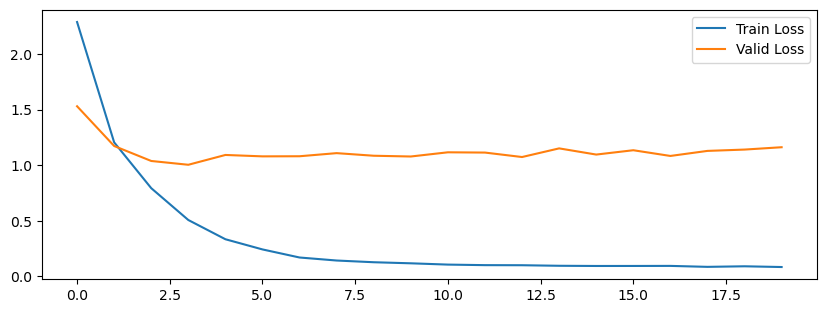

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3.5))
plt.plot(results['Loss'], label='Train Loss')
plt.plot(results['Val_Loss'], label='Valid Loss')
plt.legend()
plt.show()

In [132]:
from torch.nn import functional as F

pred = []

model.eval() # 추론 모드
with torch.no_grad(): # 자동 미분 off
    for x, y in dataloader_valid:
        x, y = x.view(-1, input_size).to(device), y.to(device)
        h = model(x) # 출력 값 생성
        pred.append(F.softmax(h, dim=1).argmax(dim=1).detach().cpu().numpy())
pred = np.concatenate(pred) # 전체 배치 예측 확률 통합
pred

array([ 3, 10,  1, ...,  3,  3,  1], dtype=int64)

In [133]:
from sklearn.metrics import classification_report

report = classification_report(dataloader_valid.dataset.target, pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.69      0.82      0.75       105
           2       0.81      0.65      0.72        20
           3       0.91      0.94      0.93       813
           4       0.86      0.85      0.86       474
           5       0.50      0.20      0.29         5
           6       0.79      0.79      0.79        14
           7       1.00      0.33      0.50         3
           8       0.72      0.74      0.73        38
           9       0.80      0.80      0.80        25
          10       0.87      0.90      0.89        30
          11       0.59      0.80      0.68        83
          12       0.43      0.23      0.30        13
          13       0.63      0.59      0.61        37
          14       0.50      0.50      0.50         2
          15       0.25      0.11      0.15         9
          16       0.63      0.81      0.71        99
          17       1.00    

C:\Users\Mana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [134]:
input_size = 10000
hidden_size = 16
model = MultiClassClassifier(input_size, hidden_size).to(device)

In [135]:
loss = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), weight_decay=0.1)

In [136]:
from tqdm import tqdm

epochs = 20
results = {'Loss':[], 'Val_Loss':[]}

# 프로그레스 바 생성
progress_bar = tqdm(range(1, epochs+1))

for epoch in progress_bar:
    train_loss = 0
    valid_loss = 0
    
    n_samples_train = len(dataloader_train.dataset)
    n_samples_valid = len(dataloader_valid.dataset)
    
    model.train() # 학습 모드
    for x, y in dataloader_train:
        # 4D Tensor를 FC에 넣기 위해 2D Tensor로 형태 변경
        x, y = x.view(-1, input_size).to(device), y.to(device)
        h = model(x) # 예측 값 생성
        cost = loss(h, y) # 비용 계산
        
        optimizer.zero_grad() # 누적 값 초기화
        cost.backward() # 역전파
        optimizer.step() # 파라미터 업데이트
        
        train_loss += (cost.item()*x.shape[0]/n_samples_train)
    results['Loss'].append(train_loss)
    
    model.eval() # 추론 모드
    with torch.no_grad(): # 자동 미분 off
        for x, y in dataloader_valid:
            x, y = x.view(-1, input_size).to(device), y.to(device)
            h = model(x)
            cost = loss(h, y)

            valid_loss += (cost.item()*x.shape[0]/n_samples_valid)
    # 프로그레스 바 출력 메시지 업데이트
    progress_bar.set_postfix(Loss=f'{train_loss:10.5f}', 
                             Val_Loss=f'{valid_loss:10.5f}')
    results['Val_Loss'].append(valid_loss)

100%|██████████████████████████████████████████████████| 20/20 [00:06<00:00,  3.06it/s, Loss=1.80136, Val_Loss=1.81023]


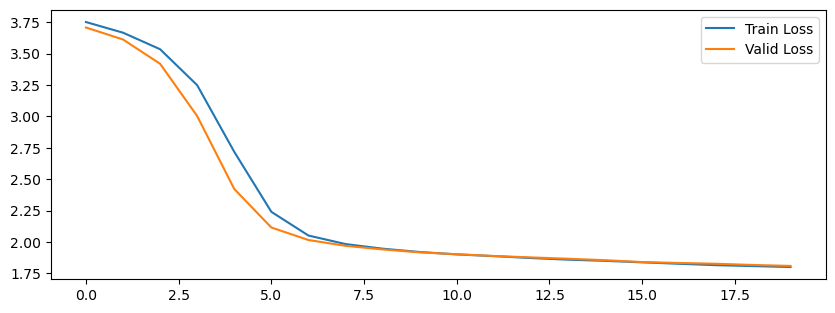

In [137]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3.5))
plt.plot(results['Loss'], label='Train Loss')
plt.plot(results['Val_Loss'], label='Valid Loss')
plt.legend()
plt.show()

In [138]:
from torch.nn import functional as F

pred = []

model.eval() # 추론 모드
with torch.no_grad(): # 자동 미분 off
    for x, y in dataloader_valid:
        x, y = x.view(-1, input_size).to(device), y.to(device)
        h = model(x) # 출력 값 생성
        pred.append(F.softmax(h, dim=1).argmax(dim=1).detach().cpu().numpy())
pred = np.concatenate(pred) # 전체 배치 예측 확률 통합
pred

array([ 3, 19,  4, ...,  3,  4,  4], dtype=int64)

In [139]:
from sklearn.metrics import classification_report

report = classification_report(dataloader_valid.dataset.target, pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00       105
           2       0.00      0.00      0.00        20
           3       0.78      0.91      0.84       813
           4       0.41      0.96      0.57       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.00      0.00      0.00        99
          17       0.00    

C:\Users\Mana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
class MultiClassClassifier(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.output = nn.Linear(hidden_size, 46)
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        
    def forward(self, x):
        out = self.relu(self.fc1(x))
        out = self.dropout(out)
        out = self.relu(self.fc2(out))
        out = self.dropout(out)
        out = self.output(out)
        return out

In [141]:
input_size = 10000
hidden_size = 16
model = MultiClassClassifier(input_size, hidden_size).to(device)

In [142]:
loss = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters())

In [143]:
from tqdm import tqdm

epochs = 20
results = {'Loss':[], 'Val_Loss':[]}

# 프로그레스 바 생성
progress_bar = tqdm(range(1, epochs+1))

for epoch in progress_bar:
    train_loss = 0
    valid_loss = 0
    
    n_samples_train = len(dataloader_train.dataset)
    n_samples_valid = len(dataloader_valid.dataset)
    
    model.train() # 학습 모드
    for x, y in dataloader_train:
        # 4D Tensor를 FC에 넣기 위해 2D Tensor로 형태 변경
        x, y = x.view(-1, input_size).to(device), y.to(device)
        h = model(x) # 예측 값 생성
        cost = loss(h, y) # 비용 계산
        
        optimizer.zero_grad() # 누적 값 초기화
        cost.backward() # 역전파
        optimizer.step() # 파라미터 업데이트
        
        train_loss += (cost.item()*x.shape[0]/n_samples_train)
    results['Loss'].append(train_loss)
    
    model.eval() # 추론 모드
    with torch.no_grad(): # 자동 미분 off
        for x, y in dataloader_valid:
            x, y = x.view(-1, input_size).to(device), y.to(device)
            h = model(x)
            cost = loss(h, y)

            valid_loss += (cost.item()*x.shape[0]/n_samples_valid)
    # 프로그레스 바 출력 메시지 업데이트
    progress_bar.set_postfix(Loss=f'{train_loss:10.5f}', 
                             Val_Loss=f'{valid_loss:10.5f}')
    results['Val_Loss'].append(valid_loss)

100%|██████████████████████████████████████████████████| 20/20 [00:06<00:00,  2.99it/s, Loss=1.54337, Val_Loss=1.46481]


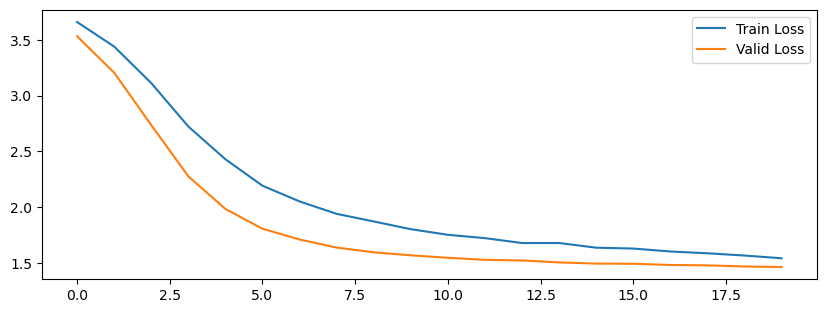

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3.5))
plt.plot(results['Loss'], label='Train Loss')
plt.plot(results['Val_Loss'], label='Valid Loss')
plt.legend()
plt.show()

In [145]:
from torch.nn import functional as F

pred = []

model.eval() # 추론 모드
with torch.no_grad(): # 자동 미분 off
    for x, y in dataloader_valid:
        x, y = x.view(-1, input_size).to(device), y.to(device)
        h = model(x) # 출력 값 생성
        pred.append(F.softmax(h, dim=1).argmax(dim=1).detach().cpu().numpy())
pred = np.concatenate(pred) # 전체 배치 예측 확률 통합
pred

array([ 3,  4,  1, ...,  3,  3, 19], dtype=int64)

In [146]:
from sklearn.metrics import classification_report

report = classification_report(dataloader_valid.dataset.target, pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.23      0.63      0.34       105
           2       0.00      0.00      0.00        20
           3       0.88      0.95      0.91       813
           4       0.71      0.91      0.80       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.67      0.70      0.68        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.46      0.80      0.58        99
          17       0.00    

C:\Users\Mana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mana\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RNN

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [148]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset

In [149]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
seed = 1234
torch.manual_seed(seed)

In [150]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size,
                             num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out, (h, c) = self.lstm(x)
        out = self.fc(out[:, -1, :].view(x.shape[0], -1))
        return out

In [151]:
x = torch.FloatTensor([1,2,3,4,5]).view(-1,5,1)
y = torch.FloatTensor([6]).view(-1, 1)

model = LSTMModel(1, 15).to(device)
loss = nn.MSELoss().to(device)
optimizer = optim.Adam(model.parameters())

In [152]:
summary(model)

Layer (type:depth-idx)                   Param #
LSTMModel                                --
├─LSTM: 1-1                              1,080
├─Linear: 1-2                            16
Total params: 1,096
Trainable params: 1,096
Non-trainable params: 0

In [153]:
from tqdm import tqdm

epochs = 10000
results = {'Loss':[]}

progress_bar = tqdm(range(1, epochs+1))

model.train()
for epoch in progress_bar:
    x, y = x.to(device), y.to(device)
    h = model(x)
    cost = loss(h, y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    results['Loss'].append(cost.item())
    progress_bar.set_postfix(Loss=f'{cost.item():12.7f}')

100%|███████████████████████████████████████████████████████████| 10000/10000 [00:20<00:00, 496.50it/s, Loss=0.0000000]


In [154]:
model(x)

tensor([[6.]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [155]:
seed = 1234
torch.manual_seed(seed)

In [156]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size,
                             num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out, (h, c) = self.lstm(x)
        out = self.fc(out)
        return out

In [157]:
x = torch.FloatTensor([1,2,3,4,5]).view(-1,5,1)
y = torch.FloatTensor([2,3,4,5,6]).view(-1,5,1)

model = LSTMModel(1, 15).to(device)
loss = nn.MSELoss().to(device)
optimizer = optim.Adam(model.parameters())

In [158]:
summary(model)

Layer (type:depth-idx)                   Param #
LSTMModel                                --
├─LSTM: 1-1                              1,080
├─Linear: 1-2                            16
Total params: 1,096
Trainable params: 1,096
Non-trainable params: 0

In [159]:
from tqdm import tqdm

epochs = 10000
results = {'Loss':[]}

progress_bar = tqdm(range(1, epochs+1))

model.train()
for epoch in progress_bar:
    x, y = x.to(device), y.to(device)
    h = model(x)
    cost = loss(h, y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    results['Loss'].append(cost.item())
    progress_bar.set_postfix(Loss=f'{cost.item():12.7f}')

100%|███████████████████████████████████████████████████████████| 10000/10000 [00:17<00:00, 562.24it/s, Loss=0.0000000]


In [160]:
model(x)

tensor([[[2.0000],
         [2.9997],
         [3.9994],
         [4.9992],
         [5.9990]]], device='cuda:0', grad_fn=<ViewBackward0>)

In [161]:
seed = 1234
torch.manual_seed(seed)

In [162]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True,
                             num_layers=num_layers, bidirectional=True)
        self.fc = nn.Linear(hidden_size*2, 1) # 양방향을 위해 2배
    
    def forward(self, x):
        out, (h, c) = self.lstm(x)
        out = self.fc(out[:, -1, :].view(x.shape[0], -1))
        return out

In [163]:
x = torch.FloatTensor([1,2,3,4,5]).view(-1,5,1)
y = torch.FloatTensor([6]).view(-1, 1)

model = LSTMModel(1, 15).to(device)
loss = nn.MSELoss().to(device)
optimizer = optim.Adam(model.parameters())

In [164]:
summary(model)

Layer (type:depth-idx)                   Param #
LSTMModel                                --
├─LSTM: 1-1                              2,160
├─Linear: 1-2                            31
Total params: 2,191
Trainable params: 2,191
Non-trainable params: 0

In [165]:
from tqdm import tqdm

epochs = 10000
results = {'Loss':[]}

progress_bar = tqdm(range(1, epochs+1))

model.train()
for epoch in progress_bar:
    x, y = x.to(device), y.to(device)
    h = model(x)
    cost = loss(h, y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    results['Loss'].append(cost.item())
    progress_bar.set_postfix(Loss=f'{cost.item():12.7f}')

100%|███████████████████████████████████████████████████████████| 10000/10000 [00:23<00:00, 422.31it/s, Loss=0.0000000]


In [166]:
model(x)

tensor([[6.]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [167]:
seed = 1234
torch.manual_seed(seed)

In [168]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True,
                             num_layers=num_layers, bidirectional=True)
        self.fc = nn.Linear(hidden_size*2, 1) # 양방향을 위해 2배
    
    def forward(self, x):
        out, (h, c) = self.lstm(x)
        out = self.fc(out)
        return out

In [169]:
x = torch.FloatTensor([1,2,3,4,5]).view(-1,5,1)
y = torch.FloatTensor([2,3,4,5,6]).view(-1,5,1)

model = LSTMModel(1, 15).to(device)
loss = nn.MSELoss().to(device)
optimizer = optim.Adam(model.parameters())

In [170]:
summary(model)

Layer (type:depth-idx)                   Param #
LSTMModel                                --
├─LSTM: 1-1                              2,160
├─Linear: 1-2                            31
Total params: 2,191
Trainable params: 2,191
Non-trainable params: 0

In [171]:
from tqdm import tqdm

epochs = 10000
results = {'Loss':[]}

progress_bar = tqdm(range(1, epochs+1))

model.train()
for epoch in progress_bar:
    x, y = x.to(device), y.to(device)
    h = model(x)
    cost = loss(h, y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    results['Loss'].append(cost.item())
    progress_bar.set_postfix(Loss=f'{cost.item():12.7f}')

100%|███████████████████████████████████████████████████████████| 10000/10000 [00:21<00:00, 471.38it/s, Loss=0.0000000]


In [172]:
model(x)

tensor([[[2.0000],
         [3.0000],
         [4.0000],
         [5.0000],
         [6.0000]]], device='cuda:0', grad_fn=<ViewBackward0>)

In [173]:
seed = 1234
torch.manual_seed(seed)

In [174]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size,
                             num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out, (h, c) = self.lstm(x)
        out = self.fc(out[:, -1, :].view(x.shape[0], -1))
        return out

In [175]:
x = torch.FloatTensor([1,2,3,4,5]).view(-1,5,1)
y = torch.FloatTensor([6]).view(-1, 1)

model = LSTMModel(1, 15, num_layers=2).to(device)
loss = nn.MSELoss().to(device)
optimizer = optim.Adam(model.parameters())

In [176]:
summary(model)

Layer (type:depth-idx)                   Param #
LSTMModel                                --
├─LSTM: 1-1                              3,000
├─Linear: 1-2                            16
Total params: 3,016
Trainable params: 3,016
Non-trainable params: 0

In [177]:
from tqdm import tqdm

epochs = 10000
results = {'Loss':[]}

progress_bar = tqdm(range(1, epochs+1))

model.train()
for epoch in progress_bar:
    x, y = x.to(device), y.to(device)
    h = model(x)
    cost = loss(h, y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    results['Loss'].append(cost.item())
    progress_bar.set_postfix(Loss=f'{cost.item():12.7f}')

100%|███████████████████████████████████████████████████████████| 10000/10000 [00:23<00:00, 418.59it/s, Loss=0.0000000]


In [352]:
model(x)

tensor([[6.]], device='cuda:0', grad_fn=<AddmmBackward0>)

### Tokenizer

In [179]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [180]:
from nltk.tokenize import word_tokenize, wordpunct_tokenize
import nltk

text = 'I love "jamon" and cheese.'

nltk.download('punkt')
print(word_tokenize(text))
print(wordpunct_tokenize(text))

['I', 'love', '``', 'jamon', "''", 'and', 'cheese', '.']
['I', 'love', '"', 'jamon', '"', 'and', 'cheese', '.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [181]:
pip install transformers==4.27

Note: you may need to restart the kernel to use updated packages.


In [182]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
print(tokenizer.tokenize('I love jamon and cheese'))

['i', 'love', 'jam', '##on', 'and', 'cheese']


In [183]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [184]:
from konlpy.tag import Okt

text = '나는 하몽과 치즈를 좋아한다.'
okt = Okt()
okt.morphs(text)

['나', '는', '하몽', '과', '치즈', '를', '좋아한다', '.']

In [185]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('klue/bert-base')
print(tokenizer.tokenize(text))

['나', '##는', '하', '##몽', '##과', '치즈', '##를', '좋아한다', '.']


### Vectorize

In [187]:
corpus = [
    'Christmas Tree Farm',
    'Last Christmas',
    'Have Yourself A Merry Little Christmas',
    "It's Christmas",
    'Make It To Christmas',
    'come out and play',
    'All I Want For Christmas Is You',
    'We Wish You A Merry Christmas'
]

In [188]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer()
bow.fit(corpus)
bow.vocabulary_

{'christmas': 2,
 'tree': 16,
 'farm': 4,
 'last': 9,
 'have': 6,
 'yourself': 21,
 'merry': 12,
 'little': 10,
 'it': 8,
 'make': 11,
 'to': 15,
 'come': 3,
 'out': 13,
 'and': 1,
 'play': 14,
 'all': 0,
 'want': 17,
 'for': 5,
 'is': 7,
 'you': 20,
 'we': 18,
 'wish': 19}

In [189]:
text = 'All I Want For Christmas Is You'
bow_vec = bow.transform([text])
print('BoW Vector:', bow_vec.toarray())

BoW Vector: [[1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0]]


In [190]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(corpus)
tfidf.transform([text]).toarray()

array([[0.4076178 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.91315263, 0.        ]])

In [191]:
tfidf.get_feature_names_out()

array(['christmas', 'come', 'farm', 'little', 'make', 'merry', 'play',
       'tree', 'want', 'wish'], dtype=object)

In [192]:
from nltk.tokenize import word_tokenize

tokenized_sentences = [word_tokenize(sentence) for sentence in corpus]
tokenized_sentences

[['Christmas', 'Tree', 'Farm'],
 ['Last', 'Christmas'],
 ['Have', 'Yourself', 'A', 'Merry', 'Little', 'Christmas'],
 ['It', "'s", 'Christmas'],
 ['Make', 'It', 'To', 'Christmas'],
 ['come', 'out', 'and', 'play'],
 ['All', 'I', 'Want', 'For', 'Christmas', 'Is', 'You'],
 ['We', 'Wish', 'You', 'A', 'Merry', 'Christmas']]

In [ ]:
pip install gensim

In [193]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=tokenized_sentences, vector_size=5, window=3,
                 sg=1, min_count=1)
print('Merry:', model.wv.get_vector('Merry'))
print('Chistmas:', model.wv.get_vector('Christmas'))

Merry: [-0.0362751   0.0575727   0.01989757 -0.16573125 -0.18902458]
Chistmas: [-0.01072454  0.00472863  0.10206699  0.18018547 -0.186059  ]


In [196]:
import pandas as pd

df = pd.read_csv('../data/spam.csv', encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [197]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [198]:
df['v1'] = df['v1'].replace(['ham', 'spam'], [0, 1])
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [199]:
df.drop_duplicates(subset=['v2'], inplace=True)
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


<Axes: >

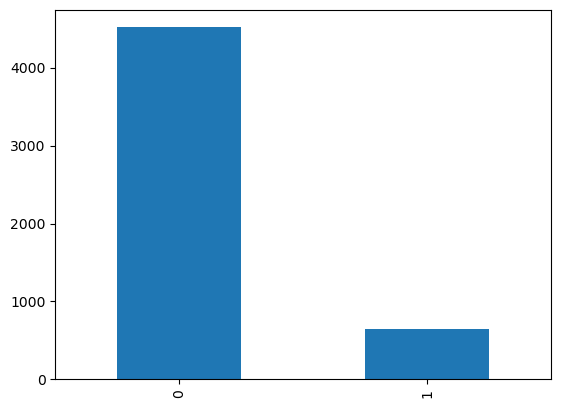

In [201]:
df['v1'].value_counts().plot(kind='bar')

In [202]:
X = df['v2'].values
Y = df['v1'].values

In [203]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(
    X, Y, random_state=0, stratify=Y)

In [204]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

tokenizer = get_tokenizer('basic_english')

def token_generator(x):
    for i, text in enumerate(x):
        yield tokenizer(text)

vocab = build_vocab_from_iterator(
    iterator=token_generator(x_train),
    specials=['<pad>','<sos>','<eos>','<unk>']
)
vocab.set_default_index(vocab['<unk>'])

In [205]:
vocab_size = len(vocab.get_stoi())
vocab_size

7777

In [206]:
word_to_index = vocab.get_stoi()
print(word_to_index)

{'pls': 134, '<eos>': 2, 'msging': 6061, 'daily': 1496, 'boltblue': 4354, 'nobody': 1018, '2-4-1': 3642, '2morro': 2247, 'dps': 4900, 'today': 105, 'power': 1360, '\\walk': 3983, 'ur': 52, 'worry': 455, 'listen': 646, 'somone': 6972, 'if': 43, '2nights': 3683, '078498****7': 3423, "'": 8, '83110': 3868, 'neglet': 6125, 'mudyadhu': 6072, 'points': 582, 'latest': 364, 'addie': 2325, 'joke': 1333, 'smoke': 612, '<pad>': 0, 'message': 187, '08715203652': 3482, 'dramatic': 4903, 'all': 64, 'vat': 7489, 'jaykwon': 5638, 'to': 7, 'wee': 3289, 'credit': 829, '10': 517, 'or': 38, '\\dont': 3938, ')': 32, 'every': 192, '\\gimme': 3945, 'mouse': 6052, 'scold': 3059, 'pc': 1024, 'way': 152, '<sos>': 1, 'pub': 693, 'avatar': 1787, 'sn': 3114, 'yummy': 3323, 'ias': 5509, 'i': 5, 'ball': 4240, '1000': 1725, 'ml': 6017, 'you': 6, 'age': 715, 'engin': 2590, 'gotten': 2678, '09066364311': 3563, 'land': 605, 'eek': 2581, 'blog': 4334, 'confidence': 1846, 'inde': 5553, 'advice': 1250, '.': 4, 'nope': 609,

In [207]:
def sent2seq(sentences):
    seqs = []
    
    for sentence in sentences:
        seq = np.array([vocab[t] for t in tokenizer(sentence)])
        seqs.append(torch.LongTensor(seq))
    return seqs

train_sequences = sent2seq(x_train)
valid_sequences = sent2seq(x_valid)

In [208]:
length = [len(seq) for seq in train_sequences]
max(length), min(length)

(212, 1)

In [209]:
from torch.nn.utils.rnn import pad_sequence

def custom_padding(sequences, maxlen=None, padding='pre', pad=0.0):
    if maxlen:
        sequences.append(torch.LongTensor([pad]*maxlen))
    
    if padding == 'post':
        result = pad_sequence(sequences, batch_first=True, padding_value=pad)
    elif padding == 'pre':
        temp_seqs = [seq.flip(-1) for seq in sequences]
        result = pad_sequence(temp_seqs, batch_first=True, padding_value=pad).flip(-1)

    if maxlen:
        sequences.pop()
    return result[:-1]
        
train_sequences_padded = custom_padding(train_sequences, maxlen=212)
valid_sequences_padded = custom_padding(valid_sequences, maxlen=212)

In [210]:
from torch.utils.data import Dataset
import numpy as np

class CustomDataset(Dataset):
    def __init__(self, x, y):
        super().__init__()
        self.data = x
        self.target = y.reshape(-1, 1).astype('float32')

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx], self.target[idx]

In [211]:
train_set = CustomDataset(train_sequences_padded, y_train)
valid_set = CustomDataset(valid_sequences_padded, y_valid)

In [212]:
from torch.utils.data import DataLoader

SEED = 1234
torch.manual_seed(SEED)

batch_size = 64

dataloader_train = DataLoader(dataset=train_set,batch_size=batch_size,
                              shuffle=True)
dataloader_valid = DataLoader(dataset=valid_set,batch_size=batch_size)

In [213]:
class LSTMTextClsssifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_size):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim)
        
        self.lstm = nn.LSTM(embed_dim, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
        
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.embed(x)
        out, (h, c) = self.lstm(out)
        out = self.sigmoid(self.fc(out[:, -1, :]))
        return out

In [215]:
vocab_size = len(vocab.get_stoi())
model = LSTMTextClsssifier(vocab_size, 32, 32).to(device)
loss = nn.BCELoss().to(device)
optimizer = optim.RMSprop(model.parameters())

In [216]:
from tqdm import tqdm

epochs = 4
results = {'Loss':[], 'Val_Loss':[]}

# 프로그레스 바 생성
progress_bar = tqdm(range(1, epochs+1))

for epoch in progress_bar:
    train_loss = 0
    valid_loss = 0
    
    n_samples_train = len(dataloader_train.dataset)
    n_samples_valid = len(dataloader_valid.dataset)
    
    model.train() # 학습 모드
    for x, y in dataloader_train:
        x, y = x.to(device), y.to(device)
        h = model(x) # 예측 값 생성
        cost = loss(h, y) # 비용 계산
        
        optimizer.zero_grad() # 누적 값 초기화
        cost.backward() # 역전파
        optimizer.step() # 파라미터 업데이트
        
        train_loss += (cost.item()*x.shape[0]/n_samples_train)
    results['Loss'].append(train_loss)
    
    model.eval() # 추론 모드
    with torch.no_grad(): # 자동 미분 off
        for x, y in dataloader_valid:
            x, y = x.to(device), y.to(device)
            h = model(x)
            cost = loss(h, y)

            valid_loss += (cost.item()*x.shape[0]/n_samples_valid)
    # 프로그레스 바 출력 메시지 업데이트
    progress_bar.set_postfix(Loss=f'{train_loss:10.5f}', 
                             Val_Loss=f'{valid_loss:10.5f}')
    results['Val_Loss'].append(valid_loss)

100%|████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.92it/s, Loss=0.01024, Val_Loss=0.06623]


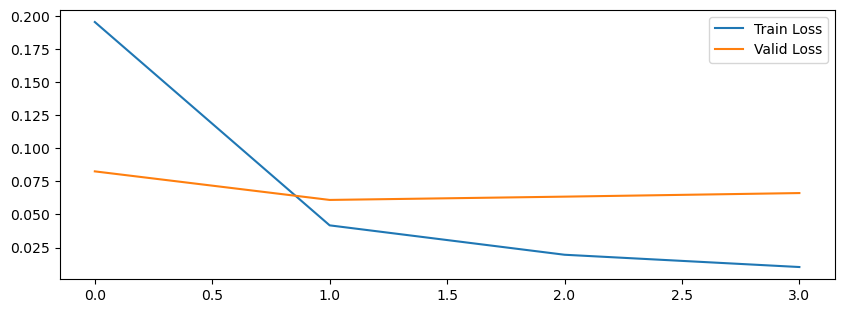

In [217]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3.5))
plt.plot(results['Loss'], label='Train Loss')
plt.plot(results['Val_Loss'], label='Valid Loss')
plt.legend()
plt.show()

In [218]:
from torch.nn import functional as F

pred = []

model.eval() # 추론 모드
with torch.no_grad(): # 자동 미분 off
    for x, y in dataloader_valid:
        x, y = x.to(device), y.to(device)
        h = model(x) # 출력 값 생성
        pred.append((h>0.5).int().detach().cpu().numpy())
pred = np.concatenate(pred) # 전체 배치 예측 확률 통합
print(pred.reshape(-1))

[0 0 0 ... 0 0 0]


In [219]:
from sklearn.metrics import classification_report

print(classification_report(dataloader_valid.dataset.target, pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1130
         1.0       0.95      0.90      0.92       163

    accuracy                           0.98      1293
   macro avg       0.97      0.95      0.96      1293
weighted avg       0.98      0.98      0.98      1293



## Sequence to Sequence

In [1]:
import requests
import zipfile
import os

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'
}

# 스페인어-영어 말 묶음 다운로드
url ='http://www.manythings.org/anki/spa-eng.zip'
filename = 'spa_eng.zip'

with open(filename, 'wb') as f:
    r = requests.get(url, headers=headers)
    f.write(r.content)

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(os.getcwd())


In [2]:
# 영-스 병렬 말묶음 읽기
# 0, 1번 열만 사용 (2번 열은 라이선스 정보)
import pandas as pd

df = pd.read_csv('spa.txt', names=['eng', 'spa'], sep='\t', usecols=[0,1])
df

,eng,spa
0,Go.,Ve.
1,Go.,Vete.
2,Go.,Vaya.
3,Go.,Váyase.
4,Hi.,Hola.
...,...,...
140863,A carbon footprint is the amount of carbon dio...,Una huella de carbono es la cantidad de contam...
140864,Since there are usually multiple websites on a...,Como suele haber varias páginas web sobre cual...
140865,"If you want to sound like a native speaker, yo...","Si quieres sonar como un hablante nativo, debe..."
140866,It may be impossible to get a completely error...,Puede que sea imposible obtener un corpus comp...


In [3]:
n_samples = 50000 # 5만개 데이터를 학습
train = df[:n_samples].copy()
train.head()

,eng,spa
0,Go.,Ve.
1,Go.,Vete.
2,Go.,Vaya.
3,Go.,Váyase.
4,Hi.,Hola.


In [4]:
import unicodedata
{c:unicodedata.category(c) for c in unicodedata.normalize('NFD', train['spa'][100])}

{'S': 'Lu', 'e': 'Ll', '́': 'Mn', '.': 'Po'}

In [5]:
import unicodedata

# 액센트 기호 제거 함수
def removeAccents(x):
    char_list = []
    for char in unicodedata.normalize('NFD', x):
        if unicodedata.category(char) != 'Mn': # accent 기호
            char_list.append(char)
    return ''.join(char_list)

print('제거 전:', train.loc[41365, 'spa'])
print('제거 후:', removeAccents(train.loc[41365, 'spa']))

제거 전: Tienen una linda casa.
제거 후: Tienen una linda casa.


In [6]:
import re

# 전처리 함수 정의
def text_preprocess(text):
    # 액센트 기호 제거
    text = removeAccents(text.lower())

    # 알파벳 및 일부 기호(물음표, 느낌표, 마침표)를 제외한 문자 제거
    text = re.sub(r'[^a-z0-9!.?]+', r' ', text)

    # 기호와 단어 사이 공백 추가
    text = re.sub(r'([?.!])', r' \1', text)

    # 연속 공백 제거
    text = re.sub(r'\s+', ' ', text)

    return text.strip()

In [7]:
# 전처리 함수 동작 확인
print('영어 문장 원본: \t', train.loc[219, 'eng'].strip())
print('영어 문장 전처리: \t' ,text_preprocess(train.loc[219, 'eng']))
print('스페인어 문장 원본: \t', train.loc[219, 'spa'])
print('스페인어 문장 전처리: \t', text_preprocess(train.loc[219, 'spa']))

영어 문장 원본: 	 Hold it.
영어 문장 전처리: 	 hold it .
스페인어 문장 원본: 	 Sosténgala.
스페인어 문장 전처리: 	 sostengala .


In [8]:
# 스페인어 인코더 입력 전처리
words = train['spa'].apply(text_preprocess).str.split()
spa_encoder_input_sentences = [word for word in words]

In [9]:
# 영어 디코더 입력/레이블 전처리
eng_preprocessed_series = train['eng'].apply(text_preprocess)
input_words = ('<sos> ' + eng_preprocessed_series).str.split()
label_words = (eng_preprocessed_series + ' <eos>').str.split()

eng_decoder_input_sentences = [word for word in input_words]
eng_decoder_label_sentences = [word for word in label_words]

In [10]:
# 전처리된 문장 확인
print('Encoder Inputs: ', spa_encoder_input_sentences[:3])
print('Decoder Inputs: ', eng_decoder_input_sentences[:3])
print('Decoder Labels: ', eng_decoder_label_sentences[:3])

Encoder Inputs:  [['ve', '.'], ['vete', '.'], ['vaya', '.']]
Decoder Inputs:  [['<sos>', 'go', '.'], ['<sos>', 'go', '.'], ['<sos>', 'go', '.']]
Decoder Labels:  [['go', '.', '<eos>'], ['go', '.', '<eos>'], ['go', '.', '<eos>']]


In [11]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
import numpy as np

# 스페인어 토큰화 Torch
def token_generator(data):
    for x in data:
        yield x

vocab_spa_torch = build_vocab_from_iterator(
    iterator=token_generator(spa_encoder_input_sentences),
    specials=['<PAD>', '<OOV>'])
vocab_spa_torch.set_default_index(vocab_spa_torch['<OOV>'])
len(vocab_spa_torch.get_stoi())

12933

In [12]:
vocab_eng_torch = build_vocab_from_iterator(
    iterator=token_generator(eng_decoder_input_sentences+eng_decoder_label_sentences),
    specials=['<PAD>', '<OOV>'])
vocab_eng_torch.set_default_index(vocab_eng_torch['<OOV>'])
len(vocab_eng_torch.get_stoi())

6659

In [13]:
def sent2seq_spa(sentences):
    ret = []
    for sentence in sentences:
        seq = [vocab_spa_torch[token] for token in sentence]
        ret.append(seq)
    return ret

def sent2seq_eng(sentences):
    ret = []
    for sentence in sentences:
        seq = [vocab_eng_torch[token] for token in sentence]
        ret.append(seq)
    return ret

encoder_inputs_torch = sent2seq_spa(spa_encoder_input_sentences)
decoder_inputs_torch = sent2seq_eng(eng_decoder_input_sentences)
decoder_labels_torch = sent2seq_eng(eng_decoder_label_sentences)

In [14]:
# 입력 문장 최대 길이 확인
encoder_input_len_torch = max([len(i) for i in encoder_inputs_torch])
decoder_input_len_torch = max([len(i) for i in decoder_inputs_torch])
decoder_label_len_torch = max([len(i) for i in decoder_labels_torch])
print('Encoder 입력 길이:', encoder_input_len_torch)
print('Decoder 입력 길이:', decoder_input_len_torch)
print('Decoder 정답 길이:', decoder_label_len_torch)

Encoder 입력 길이: 13
Decoder 입력 길이: 10
Decoder 정답 길이: 10


In [15]:
import torch
from torch.nn.utils.rnn import pad_sequence

encoder_inputs_torch = [torch.LongTensor(seq[::-1]) for seq in encoder_inputs_torch] # pre
decoder_inputs_torch = [torch.LongTensor(seq) for seq in decoder_inputs_torch] # post
decoder_labels_torch = [torch.LongTensor(seq) for seq in decoder_labels_torch] # post

encoder_inputs_torch = pad_sequence(encoder_inputs_torch,
                               padding_value=vocab_spa_torch['<PAD>'], batch_first=True)
decoder_inputs_torch = pad_sequence(decoder_inputs_torch,
                               padding_value=vocab_eng_torch['<PAD>'], batch_first=True)
decoder_labels_torch = pad_sequence(decoder_labels_torch,
                               padding_value=vocab_eng_torch['<PAD>'], batch_first=True)

In [16]:
# 데이터 shape 확인
print('Encoder 입력:', encoder_inputs_torch.shape)
print('Decoder 입력:', decoder_inputs_torch.shape)
print('Decoder 정답:', decoder_labels_torch.shape)

Encoder 입력: torch.Size([50000, 13])
Decoder 입력: torch.Size([50000, 10])
Decoder 정답: torch.Size([50000, 10])


In [17]:
encoder_inputs_torch = torch.flip(encoder_inputs_torch, dims=(1,))
encoder_inputs_torch

tensor([[   0,    0,    0,  ...,    0,  173,    2],
        [   0,    0,    0,  ...,    0,  509,    2],
        [   0,    0,    0,  ...,    0,  558,    2],
        ...,
        [   0,    0,    0,  ..., 1261,  694,    2],
        [   0,    0,    0,  ...,  177, 1227,    2],
        [   0,    0,    0,  ..., 1203, 3523,    2]])

In [18]:
# 데이터 shape 확인
print('Encoder 입력:', encoder_inputs_torch.shape)
print('Decoder 입력:', decoder_inputs_torch.shape)
print('Decoder 정답:', decoder_labels_torch.shape)

Encoder 입력: torch.Size([50000, 13])
Decoder 입력: torch.Size([50000, 10])
Decoder 정답: torch.Size([50000, 10])


In [19]:
# 데이터 셔플
import numpy as np

n_samples = 50000

np.random.seed(1)
idx = np.arange(n_samples)
np.random.shuffle(idx)
encoder_inputs_torch = encoder_inputs_torch[idx]
decoder_inputs_torch = decoder_inputs_torch[idx]
decoder_labels_torch = decoder_labels_torch[idx]

In [20]:
# 데이터 분할
n_test_samples = int(n_samples*.2) # 8:2 분할
encoder_inputs_train_torch = encoder_inputs_torch[:-n_test_samples]
decoder_inputs_train_torch = decoder_inputs_torch[:-n_test_samples]
decoder_labels_train_torch = decoder_labels_torch[:-n_test_samples]

encoder_inputs_test_torch = encoder_inputs_torch[-n_test_samples:]
decoder_inputs_test_torch = decoder_inputs_torch[-n_test_samples:]
decoder_labels_test_torch = decoder_labels_torch[-n_test_samples:]

In [21]:
print('학습 Encoder 입력 크기:', encoder_inputs_train_torch.shape)
print('학습 Decoder 입력 크기:', decoder_inputs_train_torch.shape)
print('학습 Decoder 정답 크기:', decoder_labels_train_torch.shape)
print()
print('평가 Encoder 입력 크기:', encoder_inputs_test_torch.shape)
print('평가 Decoder 입력 크기:', decoder_inputs_test_torch.shape)
print('평가 Decoder 정답 크기:', decoder_labels_test_torch.shape)

학습 Encoder 입력 크기: torch.Size([40000, 13])
학습 Decoder 입력 크기: torch.Size([40000, 10])
학습 Decoder 정답 크기: torch.Size([40000, 10])

평가 Encoder 입력 크기: torch.Size([10000, 13])
평가 Decoder 입력 크기: torch.Size([10000, 10])
평가 Decoder 정답 크기: torch.Size([10000, 10])


In [22]:
import torch
from torch import nn
from torch import optim

In [23]:
# Encoder 구현
class LSTMEncoder(nn.Module):
    def __init__(self, hidden_size, embed_dim, enc_vocab_size, num_layers=1):
        super().__init__()

        self.embed = nn.Embedding(enc_vocab_size, embed_dim, padding_idx=0)

        self.lstm = nn.LSTM(
            input_size=embed_dim, hidden_size=hidden_size,
            num_layers=num_layers, batch_first=True)

        # 파라미터 초기화
        nn.init.xavier_uniform_(next(self.lstm.parameters()))

    def forward(self, x):
        out = self.embed(x)
        out, (hidden, cell) = self.lstm(out)

        return out, hidden, cell # Decode에 전달할 hidden, cell state도 반환

In [24]:
# Decoder 구현
class LSTMDecoder(nn.Module):
    def __init__(self, hidden_size, embed_dim, dec_vocab_size, num_layers=1):
        super().__init__()

        self.embed = nn.Embedding(dec_vocab_size, embed_dim, padding_idx=0)

        self.lstm = nn.LSTM(
            input_size=embed_dim, hidden_size=hidden_size,
            num_layers=num_layers, batch_first=True)

        self.fc1 = nn.Linear(hidden_size, dec_vocab_size)

        nn.init.xavier_uniform_(next(self.lstm.parameters()))
        nn.init.xavier_uniform_(self.fc1.weight)

    def forward(self, x, h_state, c_state): # 이전 state 입력
        out = self.embed(x)
        out, (hidden, cell) = self.lstm(out, (h_state, c_state))
        out = self.fc1(out)

        return out, hidden, cell

In [25]:
# Encoder-Decoder 모델 구현
import random
import time

class LSTMEncoderDecoderModel(nn.Module):
    def __init__(self, hidden_size, embed_dim, enc_vocab_size, dec_vocab_size, 
                 num_layers=1, tf_rate=0.5, start_token=4, device='cpu'):
        super().__init__()
        self.tf_rate = tf_rate
        self.dec_vocab_size = dec_vocab_size
        self.start_token=start_token
        self.device=device

        self.encoder = LSTMEncoder(hidden_size, embed_dim, enc_vocab_size, num_layers)
        self.decoder = LSTMDecoder(hidden_size, embed_dim, dec_vocab_size, num_layers)

    def forward(self, x_input, y_targets):
        # 출력 값을 저장할 텐서 생성
        outputs = torch.zeros(x_input.shape[0], y_targets.shape[1], 
                              self.dec_vocab_size, device=torch.device(self.device))

        # 인코드 출력 중 hidden state를 decoder 입력 state로 사용
        out, hidden, cell = self.encoder(x_input)

        # <'sos'> 토큰 입력
        input_words = [self.start_token]*x_input.shape[0]
        decoder_input = torch.LongTensor(input_words).reshape(-1, 1).to(device)

        for t in range(y_targets.shape[1]):
            out, hidden, cell = self.decoder(decoder_input, hidden, cell)

            # 교사강요
            if random.random() < self.tf_rate:
                decoder_input = y_targets[:, t].unsqueeze(-1)
            else:
                decoder_input = out.argmax(dim=2)
            outputs[:, t, :] = out.view(-1, self.dec_vocab_size)

        return outputs

In [26]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, enc_x, dec_x, dec_y):
        self.enc_x = enc_x
        self.dec_x = dec_x
        self.dec_y = dec_y

    def __len__(self):
        return len(self.enc_x)

    def __getitem__(self, idx):
        return self.enc_x[idx], self.dec_x[idx], self.dec_y[idx]

device = 'cuda' if torch.cuda.is_available() else 'cpu'    

train_set = CustomDataset(encoder_inputs_train_torch, 
                          decoder_inputs_train_torch, decoder_labels_train_torch)
test_set = CustomDataset(encoder_inputs_test_torch, 
                         decoder_inputs_test_torch, decoder_labels_test_torch)

In [32]:
from torch.utils.data import DataLoader

SEED = 777
torch.manual_seed(SEED)

train_loader = DataLoader(dataset=train_set, batch_size=128,
                          shuffle=True, drop_last=True)

valid_loader = DataLoader(dataset=test_set, batch_size=128)

In [33]:
model = LSTMEncoderDecoderModel(
    64, 64, len(vocab_spa_torch.get_stoi()), len(vocab_eng_torch.get_stoi()),
    tf_rate=1.0, device=device).to(device)

In [34]:
from torchinfo import summary

summary(model)

Layer (type:depth-idx)                   Param #
LSTMEncoderDecoderModel                  --
├─LSTMEncoder: 1-1                       --
│    └─Embedding: 2-1                    827,712
│    └─LSTM: 2-2                         33,280
├─LSTMDecoder: 1-2                       --
│    └─Embedding: 2-3                    426,176
│    └─LSTM: 2-4                         33,280
│    └─Linear: 2-5                       432,835
Total params: 1,753,283
Trainable params: 1,753,283
Non-trainable params: 0

In [35]:
target_pad_token_idx = vocab_spa_torch.get_stoi()['<PAD>']
loss = nn.CrossEntropyLoss(ignore_index=target_pad_token_idx).to(device)
optimizer = optim.Adam(model.parameters())

In [36]:
from tqdm import tqdm

n_epochs = 50 # epochs 수

results = {'Loss':[], 'Val_Loss':[]}

pbar = tqdm(range(n_epochs))

for epoch in pbar:
    train_loss = 0
    valid_loss = 0

    n_samples_train = len(train_loader.dataset)
    n_samples_valid = len(valid_loader.dataset)

    model.train() # 학습 모드
    for enc_x, dec_x, dec_y in train_loader:
        enc_x, dec_x, dec_y = enc_x.to(device), dec_x.to(device), dec_y.to(device)
        h = model(enc_x, dec_y) # 예측 값 생성
        cost = loss(h.view(-1, h.shape[2]).to(device), dec_y.view(-1)) # cost 계산

        optimizer.zero_grad() # 기울기 초기화
        cost.backward()       # 역전파 수행
        optimizer.step()      # 기울기 업데이트

        train_loss += cost*enc_x.shape[0]/n_samples_train
    results['Loss'].append(train_loss.item())
    
    model.eval()
    with torch.no_grad():
        for enc_x, dec_x, dec_y in valid_loader:
            enc_x, dec_x, dec_y = enc_x.to(device), dec_x.to(device), dec_y.to(device)
            h = model(enc_x, dec_y) # 예측 값 생성
            cost = loss(h.view(-1, h.shape[2]).to(device), dec_y.view(-1)) # cost 계산

            valid_loss += cost*enc_x.shape[0]/n_samples_valid
        pbar.set_postfix(epoch=f'{epoch:2d}', 
                         loss=f'{train_loss.item():9.5f}', val_loss=f'{valid_loss.item():9.5f}')
        results['Val_Loss'].append(train_loss.item())

100%|████████████████████████████████████████| 50/50 [02:33<00:00,  3.07s/it, epoch=49, loss=0.61612, val_loss=1.92690]


In [37]:
def predict(x_input, target_len=10):
    # 출력 값을 저장할 텐서 생성
    outputs = []

    start_token = vocab_eng_torch.get_stoi()['<sos>']
    eng_itos = vocab_eng_torch.get_itos()
    
    model.eval()
    with torch.no_grad():    
        # 인코드 출력 중 hidden state를 decoder 입력 state로 사용
        out, hidden, cell = model.encoder(x_input)

        # <'sos'> 토큰 입력
        input_words = [start_token]*x_input.shape[0]
        decoder_input = torch.LongTensor(input_words).reshape(-1, 1).to(device)
        
        c_token = ''

        for t in range(target_len):
            out, hidden, cell = model.decoder(decoder_input, hidden, cell)
            decoder_input = out.argmax(dim=2).reshape(-1, 1)
            outputs.append(decoder_input.item())
            c_token = eng_itos[outputs[-1]]
            if c_token == '<eos>':
                break
    outputs = ' '.join([eng_itos[idx] for idx in outputs[:-1]])
    return outputs

In [38]:
def preprocessing(text, max_len=13):
    seq = text_preprocess(text).split()
    seq = ['<PAD>']*(max_len-len(seq))+seq
    seq = sent2seq_spa([seq])
    seq = torch.LongTensor(seq)
    return seq

In [39]:
data = preprocessing(df.iloc[47855, 1]).to(device)
pred = predict(data)
print('spanish:', df.iloc[47855, 1])
print('english:', pred)

spanish: Tienen que ser más respetuosos.
english: you must be more polite .


In [40]:
data = preprocessing(df.iloc[30402, 1]).to(device)
pred = predict(data)
print('spanish:', df.iloc[30402, 1])
print('english:', pred)

spanish: ¿Es esto suficiente dinero?
english: is this real silver ?


## Metrics for Machine Learning

In [41]:
spa_seq = 'La única habitación libre es una habitación doble.'
eng_label_seq = 'The only room available is a double.'
eng_predicted_seq = 'the only room is a light a lot of the weekend .'

In [42]:
# unigram precision
import re

predicted_text = re.sub(r'[^a-zA-Z0-9.]+', r' ', eng_predicted_seq)
predicted_text = re.sub(r'([?.!])', r' \1', predicted_text).strip().lower().split()
label_text = re.sub(r'[^a-zA-Z0-9.]+', r' ', eng_label_seq)
label_text = re.sub(r'([?.!])', r' \1', label_text).strip().lower().split()

n_total_pred = len(predicted_text)
n_total_pred_in_label = 0

for word in predicted_text:
    if word in label_text:
        n_total_pred_in_label+=1
print(f'Unigram Precision: {n_total_pred_in_label/n_total_pred: .5f}')

Unigram Precision:  0.66667


In [43]:
# modified unigram precision
predicted_text = re.sub(r'[^a-zA-Z0-9.]+', r' ', eng_predicted_seq)
predicted_text = re.sub(r'([?.!])', r' \1', predicted_text).strip().lower().split()
label_text = re.sub(r'[^a-zA-Z0-9.]+', r' ', eng_label_seq)
label_text = re.sub(r'([?.!])', r' \1', label_text).strip().lower().split()

n_total_pred = len(predicted_text)
n_total_pred_in_label = 0

for word in set(predicted_text):
    n_total_pred_in_label+=label_text.count(word)
print(f'Modified Unigram Precision: {n_total_pred_in_label/n_total_pred: .5f}')

Modified Unigram Precision:  0.50000


In [44]:
# n-gram 데이터 생성 함수
def convert_ngram(x, n):
    ret = []
    for i in range(len(x)-n+1):
        ret.append(x[i:i+n])
    return ret

In [45]:
# n-gram precision
def ngram_precision(label, pred, n):
    predicted_ngram_text = convert_ngram(pred, n)
    label_ngram_text = convert_ngram(label, n)

    n_total_pred = len(predicted_ngram_text)
    n_total_pred_in_label = 0

    for ngram in set(tuple(i) for i in predicted_ngram_text):
        n_total_pred_in_label+=label_ngram_text.count(list(ngram))
    return n_total_pred_in_label/n_total_pred if n_total_pred>0 else 0
print(f'N-gram Precision: {ngram_precision(label_text, predicted_text, 2): .5f}')

N-gram Precision:  0.27273


In [119]:
# BLEU 구현
def BLEU(label, pred, weights=(0.33, 0.33, 0.33)):
    label_len = len(label)
    pred_len = len(pred)

    # Brevity Penalty
    BP = 1 if pred_len>label_len else np.exp(1-(label_len/pred_len))

    # n-gram precision 계산
    n_precisions = np.array([ngram_precision(label, pred, n+1) for n in range(len(weights))])

    # BLEU 계산
    tol = 1e-300
    n_precisions[n_precisions == 0] += tol
    BLEU = BP * np.exp((np.log(n_precisions)*np.array(weights)).sum())
    return BLEU
print('BLEU Score:', BLEU(label_text, predicted_text))

BLEU Score: 0.2423541882452667


In [120]:
from nltk.translate.bleu_score import sentence_bleu

sentence_bleu([label_text], predicted_text, weights=(0.33, 0.33, 0.33))

0.2423541882452667

## Attention Mechanism

In [67]:
# Encoder 구현
class LSTMEncoder(nn.Module):
    def __init__(self, hidden_size, embed_dim, enc_vocab_size,
                 num_layers=1, bidirectional=False):
        super().__init__()

        self.embed = nn.Embedding(enc_vocab_size, embed_dim)

        self.lstm = nn.LSTM(
            input_size=embed_dim, hidden_size=hidden_size,
            num_layers=num_layers, batch_first=True, bidirectional=bidirectional)

        # 파라미터 초기화
        nn.init.xavier_uniform_(next(self.lstm.parameters()))

    def forward(self, x):
        out = self.embed(x)
        out, (hidden, cell) = self.lstm(out)

        return out, hidden, cell

In [68]:
# Decoder 구현
class LSTMDecoder(nn.Module):
    def __init__(self, hidden_size, embed_dim, dec_vocab_size,
                 num_layers=1, bidirectional=False):
        super().__init__()

        self.embed = nn.Embedding(dec_vocab_size, embed_dim)

        self.lstm = nn.LSTM(
            input_size=embed_dim, hidden_size=hidden_size,
            num_layers=num_layers, batch_first=True, bidirectional=bidirectional)

        nn.init.xavier_uniform_(next(self.lstm.parameters()))

    def forward(self, x, states):
        out = self.embed(x)
        out, (hidden, cell) = self.lstm(out, states)

        return out, hidden, cell

In [69]:
class BahdanauAttention(nn.Module):
    def __init__(self, hidden_size, bidirectional=False):
        super().__init__()

        if bidirectional:
            hidden_size = hidden_size*2

        self.w_query = nn.Linear(hidden_size, hidden_size, bias=False)
        self.w_key = nn.Linear(hidden_size, hidden_size, bias=False)
        self.w_combined = nn.Linear(hidden_size, 1, bias=False)

        nn.init.xavier_uniform_(self.w_query.weight)
        nn.init.xavier_uniform_(self.w_key.weight)
        nn.init.xavier_uniform_(self.w_combined.weight)

    def forward(self, query, key, value=None):
        if value == None:
            value = key
        out = torch.tanh(self.w_query(query) + self.w_key(key))
        attention_score = self.w_combined(out).permute(0, 2, 1)
        attention_weight = torch.softmax(attention_score, dim=2)
        context_vector = torch.bmm(attention_weight, value)
        return attention_score, attention_weight, context_vector

In [70]:
def LuongAttention(query, key, value=None):
    if value == None:
        value = key
    attention_score = torch.bmm(query, torch.transpose(key, 1,2))
    attention_weight = torch.softmax(attention_score, dim=2)
    context_vector = torch.bmm(attention_weight, value)
    return attention_score, attention_weight, context_vector

In [71]:
# Encoder-Decoder 모델 구현
import random

class AttentionModel(nn.Module):
    def __init__(self, hidden_size, embed_dim, enc_vocab_size, dec_vocab_size,
                 num_layers=1, tf_rate=0.5, bidirectional=False, device='cpu'):
        super().__init__()
        self.tf_rate = tf_rate
        self.dec_vocab_size = dec_vocab_size
        self.device = device

        self.encoder = LSTMEncoder(hidden_size, embed_dim, enc_vocab_size,
                                  num_layers, bidirectional=bidirectional)
        self.decoder = LSTMDecoder(hidden_size, embed_dim, dec_vocab_size,
                                  num_layers, bidirectional=bidirectional)

        self.attention = BahdanauAttention(hidden_size, bidirectional=bidirectional)

        if bidirectional:
            self.output = nn.Linear(hidden_size*2*2, dec_vocab_size)
        else:
            self.output = nn.Linear(hidden_size*2, dec_vocab_size)

        nn.init.xavier_uniform_(self.output.weight)

    def forward(self, x_input, y_targets):
        # 출력 값을 저장할 텐서 생성
        outputs = torch.zeros(x_input.shape[0], y_targets.shape[1],
                              self.dec_vocab_size, device=torch.device(self.device))

        # 인코드 출력 중 hidden state를 decoder 입력 state로 사용
        enc_out, hidden, cell= self.encoder(x_input)

        # <'sos'> 토큰 입력
        input_words = [vocab_eng_torch.get_stoi()['<sos>']]*x_input.shape[0]
        decoder_input = torch.LongTensor(input_words).reshape(-1, 1).to(device)

        for t in range(y_targets.shape[1]):
            out, hidden, cell = self.decoder(decoder_input, (hidden, cell))

            attention_score, attention_weight, context_vector = self.attention(out, enc_out)
            out = torch.cat((context_vector, out), dim=2)
            out = self.output(out)

            # 교사강요
            if random.random() < self.tf_rate:
                decoder_input = y_targets[:, t].unsqueeze(-1)
            else:
                decoder_input = out.argmax(dim=2)
            outputs[:, t, :] = out.view(-1, self.dec_vocab_size)

        return outputs

In [37]:
# Encoder-Decoder 모델 구현
import random

class AttentionModel(nn.Module):
    def __init__(self, hidden_size, embed_dim, enc_vocab_size, dec_vocab_size,
                 num_layers=1, tf_rate=0.5, bidirectional=False, device='cpu'):
        super().__init__()
        self.tf_rate = tf_rate
        self.dec_vocab_size = dec_vocab_size
        self.device = device

        self.encoder = LSTMEncoder(hidden_size, embed_dim, enc_vocab_size,
                                  num_layers, bidirectional=bidirectional)
        self.decoder = LSTMDecoder(hidden_size, embed_dim, dec_vocab_size,
                                  num_layers, bidirectional=bidirectional)

        if bidirectional:
            self.output = nn.Linear(hidden_size*2*2, dec_vocab_size)
        else:
            self.output = nn.Linear(hidden_size*2, dec_vocab_size)

        nn.init.xavier_uniform_(self.output.weight)

    def forward(self, x_input, y_targets):
        # 출력 값을 저장할 텐서 생성
        outputs = torch.zeros(x_input.shape[0], y_targets.shape[1],
                              self.dec_vocab_size, device=torch.device(self.device))

        # 인코드 출력 중 hidden state를 decoder 입력 state로 사용
        enc_out, hidden, cell = self.encoder(x_input)

        # <'sos'> 토큰 입력
        input_words = [vocab_eng_torch.get_stoi()['<sos>']]*x_input.shape[0]
        decoder_input = torch.LongTensor(input_words).reshape(-1, 1).to(device)

        for t in range(y_targets.shape[1]):
            out, hidden, cell= self.decoder(decoder_input, (hidden, cell))

            attention_score, attention_weight, context_vector = LuongAttention(out, enc_out)
            out = torch.cat((context_vector, out), dim=2)
            out = self.output(out)

            # 교사강요
            if random.random() < self.tf_rate:
                decoder_input = y_targets[:, t].unsqueeze(-1)
            else:
                decoder_input = out.argmax(dim=2)
            outputs[:, t, :] = out.view(-1, self.dec_vocab_size)

        return outputs

In [72]:
torch.manual_seed(777)

model = AttentionModel(
    64, 64, len(vocab_spa_torch.get_stoi()),len(vocab_eng_torch.get_stoi()),
    tf_rate=1.0, bidirectional=True, device=device).to(device)

loss = nn.CrossEntropyLoss(ignore_index=target_pad_token_idx).to(device)
optimizer = optim.Adam(model.parameters())

In [73]:
from tqdm import tqdm

n_epochs = 20 # epochs 수

results = {'Loss':[], 'Val_Loss':[]}

pbar = tqdm(range(n_epochs))

for epoch in pbar:
    train_loss = 0
    valid_loss = 0

    n_samples_train = len(train_loader.dataset)
    n_samples_valid = len(valid_loader.dataset)

    model.train() # 학습 모드
    for enc_x, dec_x, dec_y in train_loader:
        enc_x, dec_x, dec_y = enc_x.to(device), dec_x.to(device), dec_y.to(device)
        h = model(enc_x, dec_y) # 예측 값 생성
        cost = loss(h.view(-1, h.shape[2]).to(device), dec_y.view(-1)) # cost 계산

        optimizer.zero_grad() # 기울기 초기화
        cost.backward()       # 역전파 수행
        optimizer.step()      # 기울기 업데이트

        train_loss += cost*enc_x.shape[0]/n_samples_train
    pbar.set_postfix(epoch=f'{epoch:2d}', loss=f'{train_loss.item():9.5f}')
    results['Loss'].append(train_loss.item())
    
    model.eval()
    with torch.no_grad():
        for enc_x, dec_x, dec_y in valid_loader:
            enc_x, dec_x, dec_y = enc_x.to(device), dec_x.to(device), dec_y.to(device)
            h = model(enc_x, dec_y) # 예측 값 생성
            cost = loss(h.view(-1, h.shape[2]).to(device), dec_y.view(-1)) # cost 계산

            valid_loss += cost*enc_x.shape[0]/n_samples_valid
        pbar.set_postfix(epoch=f'{epoch:2d}', 
                         loss=f'{train_loss.item():9.5f}', val_loss=f'{valid_loss.item():9.5f}')
        results['Val_Loss'].append(train_loss.item())

100%|████████████████████████████████████████| 20/20 [02:06<00:00,  6.30s/it, epoch=19, loss=0.31021, val_loss=1.31389]


In [74]:
def predict(x_input, target_len=10):
    # 출력 값을 저장할 텐서 생성
    outputs = []
    weights = []

    start_token = vocab_eng_torch.get_stoi()['<sos>']
    eng_itos = vocab_eng_torch.get_itos()
    
    model.eval()
    with torch.no_grad():    
        # 인코드 출력 중 hidden state를 decoder 입력 state로 사용
        enc_out, hidden, cell = model.encoder(x_input)

        # <'sos'> 토큰 입력
        input_words = [start_token]*x_input.shape[0]
        decoder_input = torch.LongTensor(input_words).reshape(-1, 1).to(device)
        
        c_token = ''

        for t in range(target_len):
            out, hidden, cell = model.decoder(decoder_input, (hidden, cell))
            attention_score, attention_weight, context_vector = model.attention(out, enc_out)
            out = torch.cat((context_vector, out), dim=2)
            out = model.output(out)
            decoder_input = out.argmax(dim=2).reshape(-1, 1)
            outputs.append(decoder_input.item())
            weights.append(attention_weight.reshape(-1).detach().cpu().numpy())
            c_token = eng_itos[outputs[-1]]
            if c_token == '<eos>':
                break
    outputs = ' '.join([eng_itos[idx] for idx in outputs[:-1]])
    return outputs, weights

In [75]:
def preprocessing(text, max_len=13):
    seq = text_preprocess(text).split()
    seq = ['<PAD>']*(max_len-len(seq))+seq
    seq = sent2seq_spa([seq])
    seq = torch.LongTensor(seq)
    return seq

In [76]:
data = preprocessing(df.iloc[47855, 1]).to(device)
pred, weights= predict(data)
print('spanish:', df.iloc[47855, 1])
print('english:', pred)

spanish: Tienen que ser más respetuosos.
english: you must be more polite .


In [77]:
data = preprocessing(df.iloc[30402, 1]).to(device)
pred, weights = predict(data)
print('spanish:', df.iloc[30402, 1])
print('english:', pred)

spanish: ¿Es esto suficiente dinero?
english: is this enough money ?


<Axes: >

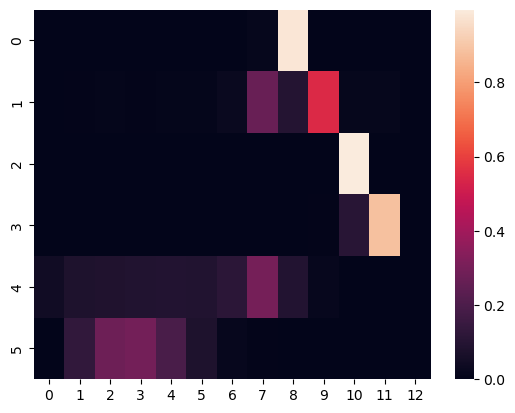

In [78]:
import seaborn as sns

sns.heatmap(np.array(weights))

## Transformer

In [79]:
class PositionalEncoding(nn.Module):
    def __init__(self, position, d_embed, dropout, device):
        super().__init__()

        self.pos_encoded = self.encode(position, d_embed).to(device)

        self.dropout = nn.Dropout(p=dropout)

    def encode(self, length, depth): # 가산될 인코딩 값 계산 함수
        positions = np.arange(length).reshape(-1, 1)

        depth_even = np.arange(depth)[np.newaxis, ::2]*2/depth
        depth_odd = np.arange(depth)[np.newaxis, 1::2]*2/depth

        angle_rate_even = 1 / (10000**depth_even)
        angle_rate_odd = 1 / (10000**depth_odd)

        angle_rad_even = positions * angle_rate_even
        angle_rad_odd = positions * angle_rate_odd

        pos_encoding = np.zeros((length, depth))
        pos_encoding[:, ::2] = np.sin(angle_rad_even)
        pos_encoding[:, 1::2] = np.cos(angle_rad_odd)

        return torch.FloatTensor(pos_encoding).unsqueeze(0)

    def forward(self, inputs):
        seq_len = inputs.shape[1]
        out = self.dropout(inputs + self.pos_encoded[:, :seq_len, :])
        return out

In [97]:
pe = PositionalEncoding(16, 64, 0.0, device)
data = pe.pos_encoded.squeeze(0).detach().cpu().numpy()
pe.pos_encoded.shape

torch.Size([1, 16, 64])

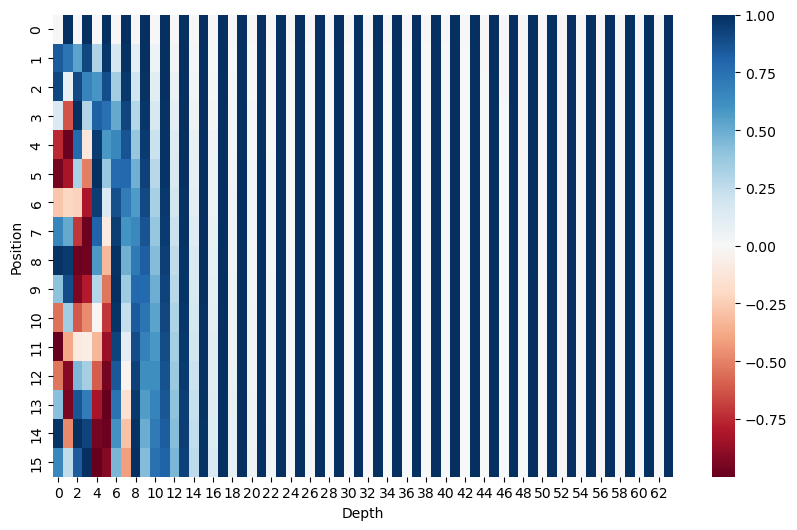

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

plt.figure(figsize=(10, 6))
sns.heatmap(data, cmap='RdBu')
plt.xlabel('Depth')
plt.ylabel('Position')
plt.show()

In [99]:
class PositionalEmbedding(nn.Module):
    def __init__(self, seq_len, d_model, d_embed, vocab_size, 
                 dropout, pad, device):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, d_embed, padding_idx=pad)
        self.positional_encoding = PositionalEncoding(seq_len, d_embed, 
                                                      dropout, device)
        self.scaler = d_model**0.5

    def forward(self, inputs):
        out = self.embed(inputs) * self.scaler
        out = self.positional_encoding(out)
        return out

In [100]:
class ScaledDotProductAttention(nn.Module):
    def __init__(self, d_k):
        super().__init__()
        self.d_k = d_k
        self.d_k_sqrt = self.d_k**(1/2)

    def forward(self, query, key, value, padding_mask, causal_mask):
        attention_score = torch.matmul(query, torch.transpose(key, -2, -1))/self.d_k_sqrt

        if padding_mask is not None and causal_mask is not None:
            mask = torch.maximum(causal_mask, padding_mask)
            attention_score = attention_score.masked_fill(mask==1, -1e9)
        elif padding_mask is not None:
            attention_score = attention_score.masked_fill(padding_mask==1, -1e9)
        elif causal_mask is not None:
            attention_score = attention_score.masked_fill(causal_mask==1, -1e9)

        attention_weight = torch.softmax(attention_score, dim=-1)
        attention_value = torch.matmul(attention_weight, value)

        return attention_score, attention_weight, attention_value

In [101]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, d_embed, n_heads, device):
        super().__init__()

        self.device = device
        self.d_model = d_model
        self.d_embed = d_embed
        self.n_heads = n_heads
        self.d_k = d_model // n_heads

        self.w_q = nn.Linear(d_embed, d_model, bias=False)
        self.w_k = nn.Linear(d_embed, d_model, bias=False)
        self.w_v = nn.Linear(d_embed, d_model, bias=False)
        self.w_0 = nn.Linear(d_model, d_embed, bias=False)

        self.attention = ScaledDotProductAttention(self.d_k)

        nn.init.kaiming_uniform_(self.w_q.weight)
        nn.init.kaiming_uniform_(self.w_k.weight)
        nn.init.kaiming_uniform_(self.w_v.weight)
        nn.init.kaiming_uniform_(self.w_0.weight)

    def forward(self, query, key, value=None, padding_mask=None, use_causal_mask=False):
        if value is None:
            value = key

        wq = self.w_q(query)
        wk = self.w_k(key)
        wv = self.w_v(value)

        wq = wq.view(wq.shape[0], -1, self.n_heads, self.d_k).permute(0, 2, 1, 3)
        wk = wk.view(wk.shape[0], -1, self.n_heads, self.d_k).permute(0, 2, 1, 3)
        wv = wv.view(wv.shape[0], -1, self.n_heads, self.d_k).permute(0, 2, 1, 3)

        if use_causal_mask:
            causal_mask = self._get_causal_mask(wq)
        else:
            causal_mask = None

        attention_score, attention_weight, attention_value = self.attention(
            wq, wk, wv, padding_mask=padding_mask, causal_mask=causal_mask)

        attention_value = attention_value.permute(0, 2, 1, 3)
        out = self.w_0(attention_value.contiguous().view(
            attention_value.shape[0], -1, self.d_model))

        return out, attention_score, attention_weight, attention_value

    def _get_causal_mask(self, x):
        mask = torch.ones((x.shape[-2], x.shape[-2]), 
                          device=torch.device(self.device)).triu(diagonal=1)
        return mask

In [102]:
class PositionWiseFedForwardNeuralNetwork(nn.Module):
    def __init__(self, d_embed, d_ff):
        super().__init__()
        self.fc1 = nn.Linear(d_embed, d_ff)
        self.fc2 = nn.Linear(d_ff, d_embed)
        self.relu = nn.ReLU()

        nn.init.kaiming_uniform_(self.fc1.weight)
        nn.init.kaiming_uniform_(self.fc2.weight)

    def forward(self, x):
        out = self.relu(self.fc1(x))
        out = self.fc2(out)
        return out

In [103]:
class TransformerEncoder(nn.Module):
    def __init__(self, d_model, d_embed, d_ff, n_heads, dropout, device):
        super().__init__()
        self.attention = MultiHeadAttention(d_model, d_embed, n_heads, device)

        self.dropout = nn.Dropout(p=dropout)

        self.layernorm1 = nn.LayerNorm(d_embed)
        self.layernorm2 = nn.LayerNorm(d_embed)

        self.fc = PositionWiseFedForwardNeuralNetwork(d_embed, d_ff)

    def forward(self, x, padding_mask=None):
        out, a, w, v = self.attention(x, x, padding_mask=padding_mask) # self attention
        out = self.dropout(out) # dropout
        out1 = self.layernorm1(x+out) # Residual Connection and Layer Normalization
        out2 = self.fc(out1) # PWFFN
        out2 = self.dropout(out2) # dropout
        out = self.layernorm2(out1+out2) # Residual Connection and Layer Normalization

        return out

In [104]:
class TransformerDecoder(nn.Module):
    def __init__(self, d_model, d_embed, d_ff, n_heads, dropout, device):
        super().__init__()
        self.self_attention = MultiHeadAttention(d_model, d_embed, n_heads, device)
        self.cross_attention = MultiHeadAttention(d_model, d_embed, n_heads, device)

        self.dropout = nn.Dropout(p=dropout)

        self.layernorm1 = nn.LayerNorm(d_embed)
        self.layernorm2 = nn.LayerNorm(d_embed)
        self.layernorm3 = nn.LayerNorm(d_embed)

        self.fc = PositionWiseFedForwardNeuralNetwork(d_embed, d_ff)

    def forward(self, x, enc_out, self_padding_mask=None, cross_padding_mask=None):
        out, a, w, v = self.self_attention(x, x, # self attention
                                           padding_mask=self_padding_mask, use_causal_mask=True)
        out = self.dropout(out) # dropout
        out1 = self.layernorm1(x+out) # Residual Connection and Layer Normalization
        out2, a, w, v = self.cross_attention(out1, enc_out, # cross attention
                                             padding_mask=cross_padding_mask)
        out2 = self.dropout(out2) # dropout
        out1 = self.layernorm2(out1+out2) # Residual Connection and Layer Normalization
        out2 = self.fc(out1) # PWFFN
        out2 = self.dropout(out2) # dropout
        out = self.layernorm3(out1+out2) # Residual Connection and Layer Normalization

        return out

In [105]:
class TransformerEncoderBlock(nn.Module):
    def __init__(self, vocab_size, seq_len, d_model, d_embed, d_ff, 
                 n_heads, dropout, n_layers, pad, device):
        super().__init__()

        self.positional_embedding = PositionalEmbedding(seq_len, d_model, d_embed, 
                                                        vocab_size, dropout, pad, device)
        self.encoders = nn.ModuleList()

        self.n_layers = n_layers

        for i in range(n_layers):
            self.encoders.append(TransformerEncoder(d_model, d_embed, d_ff, 
                                                    n_heads, dropout, device))

    def forward(self, x, mask=None):
        out = self.positional_embedding(x)

        for i in range(self.n_layers):
            out = self.encoders[i](out, padding_mask=mask)
        return out

In [106]:
class TransformerDecoderBlock(nn.Module):
    def __init__(self, vocab_size, seq_len, d_model, d_embed, d_ff,
                 n_heads, dropout, n_layers, pad, device):
        super().__init__()

        self.positional_embedding = PositionalEmbedding(seq_len, d_model, d_embed,
                                                        vocab_size, dropout, pad, device)
        self.decoders = nn.ModuleList()

        self.n_layers = n_layers

        for i in range(n_layers):
            self.decoders.append(TransformerDecoder(d_model, d_embed, d_ff,
                                                    n_heads, dropout, device))

    def forward(self, x, enc_out, self_mask=None, cross_mask=None):
        out = self.positional_embedding(x)

        for i in range(self.n_layers):
            out = self.decoders[i](out, enc_out,
                                   self_padding_mask=self_mask, cross_padding_mask=cross_mask)
        return out

In [107]:
class Transformer(nn.Module):
    def __init__(self, enc_vocab_size, dec_vocab_size, enc_seq_len, dec_seq_len, 
                 d_model=128, d_embed=128, d_ff=256, n_heads=2, dropout=0.1,
                 n_layers=2, pad=0, device='cpu'):
        super().__init__()

        self.device = device
        
        self.encoder_block = TransformerEncoderBlock(enc_vocab_size, enc_seq_len, 
                                                     d_model, d_embed, d_ff, n_heads,
                                                     dropout, n_layers, pad, device)
        self.decoder_block = TransformerDecoderBlock(dec_vocab_size, dec_seq_len,
                                                     d_model, d_embed, d_ff, n_heads,
                                                     dropout, n_layers, pad, device)

        self.fc = nn.Linear(d_embed, dec_vocab_size)

        nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, enc_input, dec_input, pad=0):
        enc_self_padding_mask = self._get_qk_padding_mask(enc_input, enc_input, pad).to(self.device)
        dec_self_padding_mask = self._get_qk_padding_mask(dec_input, dec_input, pad).to(self.device)
        dec_cross_padding_mask = self._get_qk_padding_mask(dec_input, enc_input, pad).to(self.device)

        enc_out = self.encoder_block(enc_input, enc_self_padding_mask)
        dec_out = self.decoder_block(dec_input, enc_out, dec_self_padding_mask, dec_cross_padding_mask)

        out = self.fc(dec_out)
        return out

    def _get_padding_mask(self, x, pad):
        mask = (x==pad)
        return mask.to(torch.int32)

    def _get_qk_padding_mask(self, query, key, pad):
        query_mask = self._get_padding_mask(query, pad)
        key_mask = self._get_padding_mask(key, pad)

        query_mask = query_mask.unsqueeze(1).unsqueeze(3)
        key_mask = key_mask.unsqueeze(1).unsqueeze(2)

        query_mask = query_mask.repeat(1, 1, 1, key.shape[1])
        key_mask = key_mask.repeat(1, 1, query.shape[1], 1)

        mask = query_mask | key_mask

        return mask

In [108]:
enc_vocab_size = len(vocab_spa_torch.get_stoi())
enc_seq_len = encoder_inputs_train_torch.shape[1]

dec_vocab_size = len(vocab_eng_torch.get_stoi())
dec_seq_len = decoder_inputs_train_torch.shape[1]

In [109]:
# enc_vocab_size, dec_vocab_size, enc_seq_len, dec_seq_len, d_model=128, d_embed=128, d_ff=64, n_heads=2, dropout=0.1, n_layers=5
model = Transformer(enc_vocab_size, dec_vocab_size, enc_seq_len, dec_seq_len)

# 트랜스포머 모델링 코드

In [110]:
torch.manual_seed(777)

enc_vocab_size = len(vocab_spa_torch.get_stoi())
enc_seq_len = encoder_inputs_train_torch.shape[1]

dec_vocab_size = len(vocab_eng_torch.get_stoi())
dec_seq_len = decoder_inputs_train_torch.shape[1]

model = Transformer(enc_vocab_size, dec_vocab_size,  enc_seq_len,  dec_seq_len,
                    d_model=128, d_embed=128, d_ff=256, n_heads=4, dropout=0.1, n_layers=2,
                    pad=target_pad_token_idx, device=device).to(device)
loss = nn.CrossEntropyLoss(ignore_index=target_pad_token_idx).to(device)
optimizer = optim.Adam(model.parameters(), lr=1, eps=1e-9, betas=(0.9, 0.98))

In [111]:
summary(model)

Layer (type:depth-idx)                                            Param #
Transformer                                                       --
├─TransformerEncoderBlock: 1-1                                    --
│    └─PositionalEmbedding: 2-1                                   --
│    │    └─Embedding: 3-1                                        1,655,424
│    │    └─PositionalEncoding: 3-2                               --
│    └─ModuleList: 2-2                                            --
│    │    └─TransformerEncoder: 3-3                               131,968
│    │    └─TransformerEncoder: 3-4                               131,968
├─TransformerDecoderBlock: 1-2                                    --
│    └─PositionalEmbedding: 2-3                                   --
│    │    └─Embedding: 3-5                                        852,352
│    │    └─PositionalEncoding: 3-6                               --
│    └─ModuleList: 2-4                                            --
│    │ 

In [112]:
class WarmupLRScheduler(optim.lr_scheduler.LambdaLR):
    def __init__(self, optimizer, d_model,  warmup_steps, last_epoch=-1):
        def lambda_lr(step):
            arg1 = step**-0.5 if step > 0 else 0
            arg2 = step * (warmup_steps ** -1.5)
            return (d_model**-0.5) * min(arg1, arg2)
        super().__init__(optimizer, lambda_lr, last_epoch=last_epoch)

In [113]:
d_model=128
warmup_steps=4000
scheduler = WarmupLRScheduler(optimizer, d_model, warmup_steps)

In [114]:
values = []
for step in range(40000):
    arg1 = step**-0.5 if step > 0 else 0
    arg2 = step * (warmup_steps ** -1.5)
    values.append((d_model**-0.5) * min(arg1, arg2))

Text(0, 0.5, 'Learning Rate')

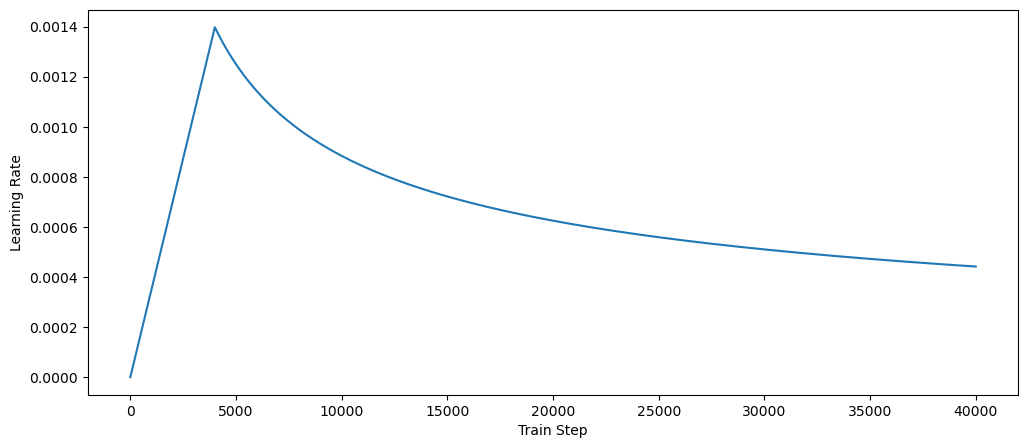

In [115]:
plt.figure(figsize=(12, 5))
plt.plot(range(40000), values)
plt.xlabel('Train Step')
plt.ylabel('Learning Rate')

In [116]:
from tqdm import tqdm

n_epochs = 50 # epochs 수

results = {'Loss':[], 'Val_Loss':[]}

pbar = tqdm(range(n_epochs))

for epoch in pbar:
    train_loss = 0
    valid_loss = 0

    n_samples_train = len(train_loader.dataset)
    n_samples_valid = len(valid_loader.dataset)

    model.train() # 학습 모드
    for enc_x, dec_x, dec_y in train_loader:
        enc_x, dec_x, dec_y = enc_x.to(device), dec_x.to(device), dec_y.to(device)
        h = model(enc_x, dec_x) # 예측 값 생성
        cost = loss(h.view(-1, h.shape[2]).to(device), dec_y.view(-1)) # cost 계산

        optimizer.zero_grad() # 기울기 초기화
        cost.backward()       # 역전파 수행
        optimizer.step()      # 기울기 업데이트
        scheduler.step()

        train_loss += cost*enc_x.shape[0]/n_samples_train
    results['Loss'].append(train_loss.item())
    
    model.eval()
    with torch.no_grad():
        for enc_x, dec_x, dec_y in valid_loader:
            enc_x, dec_x, dec_y = enc_x.to(device), dec_x.to(device), dec_y.to(device)
            h = model(enc_x, dec_x) # 예측 값 생성
            cost = loss(h.view(-1, h.shape[2]).to(device), dec_y.view(-1)) # cost 계산

            valid_loss += cost*enc_x.shape[0]/n_samples_valid
        pbar.set_postfix(epoch=f'{epoch:2d}', 
                         loss=f'{train_loss.item():9.5f}', val_loss=f'{valid_loss.item():9.5f}')
        results['Val_Loss'].append(train_loss.item())

100%|████████████████████████████████████████| 50/50 [03:46<00:00,  4.52s/it, epoch=49, loss=0.45864, val_loss=1.24768]


In [121]:
def predict(x_input, target_len=10):
    outputs = []

    start_token = vocab_eng_torch.get_stoi()['<sos>']
    pad = vocab_eng_torch.get_stoi()['<PAD>']
    eng_itos = vocab_eng_torch.get_itos()
    
    model.eval()
    with torch.no_grad():    
        input_sequence = [start_token] + ([pad]*(target_len-1))
        decoder_input = torch.LongTensor(input_sequence).reshape(1, -1).to(device)

        for t in range(target_len):
            out = model(x_input, decoder_input)
            c_token = out[:, t, :].argmax(dim=1)
            decoder_input[:, t+1] = c_token
            word = eng_itos[c_token.item()]
            if word == '<eos>':
                break
    outputs = ' '.join([eng_itos[idx] for idx in decoder_input.view(-1)[1:t+1]])
    return outputs

In [122]:
def preprocessing(text, max_len=13):
    seq = text_preprocess(text).split()
    seq = ['<PAD>']*(max_len-len(seq))+seq
    seq = sent2seq_spa([seq])
    seq = torch.LongTensor(seq)
    return seq

data = preprocessing(df.iloc[47855, 1]).to(device)
pred = predict(data)
print('spanish:', df.iloc[47855, 1])
print('english:', pred)

spanish: Tienen que ser más respetuosos.
english: they must be more polite .


In [123]:
data = preprocessing(df.iloc[30402, 1]).to(device)
pred = predict(data)
print('spanish:', df.iloc[30402, 1])
print('english:', pred)

spanish: ¿Es esto suficiente dinero?
english: is this enough money ?


### nn.Transformer 모듈을 사용한 학습

In [124]:
class TransformerModel(nn.Module):
    def __init__(self, enc_vocab_size, dec_vocab_size, enc_seq_len, dec_seq_len, 
                 d_model=128, d_embed=128, d_ff=256, n_heads=2, dropout=0.1,
                 n_layers=2, pad=0, device='cpu'):
        super().__init__()
        self.device = device
        self.pad = pad
        
        self.enc_embed = PositionalEmbedding(enc_seq_len, d_model, d_embed, enc_vocab_size, dropout, pad, device)
        self.dec_embed = PositionalEmbedding(dec_seq_len, d_model, d_embed, dec_vocab_size, dropout, pad, device)
        self.transformer = nn.Transformer(d_model, n_heads, n_layers, n_layers,
                                          d_ff, dropout, batch_first=True, device=torch.device(device))
        self.fc = nn.Linear(d_model, dec_vocab_size)
        
    def forward(self, encoder_input, decoder_input):
        enc_out = self.enc_embed(encoder_input)
        dec_out = self.dec_embed(decoder_input)
        
        enc_padding_mask = (encoder_input == self.pad).to(self.device)
        dec_padding_mask = (decoder_input == self.pad).to(self.device)
        dec_mask = self.transformer.generate_square_subsequent_mask(decoder_input.size(1)).bool().to(self.device)
        out = self.transformer(enc_out, dec_out, 
                               src_key_padding_mask=enc_padding_mask,
                               tgt_key_padding_mask=dec_padding_mask,
                               memory_key_padding_mask=enc_padding_mask, tgt_mask=dec_mask)
        out = self.fc(out)
        return out

In [125]:
torch.manual_seed(777)

enc_vocab_size = len(vocab_spa_torch.get_stoi())
enc_seq_len = encoder_inputs_train_torch.shape[1]

dec_vocab_size = len(vocab_eng_torch.get_stoi())
dec_seq_len = decoder_inputs_train_torch.shape[1]

model = TransformerModel(enc_vocab_size, dec_vocab_size,  enc_seq_len,  dec_seq_len,
                    d_model=128, d_embed=128, d_ff=256, n_heads=4, dropout=0.1, n_layers=2,
                    pad=target_pad_token_idx, device=device).to(device)
loss = nn.CrossEntropyLoss(ignore_index=target_pad_token_idx).to(device)
optimizer = optim.Adam(model.parameters(), lr=1, eps=1e-9, betas=(0.9, 0.98))

In [126]:
d_model=128
warmup_steps=4000
scheduler = WarmupLRScheduler(optimizer, d_model, warmup_steps)

In [127]:
from tqdm import tqdm

n_epochs = 50 # epochs 수

results = {'Loss':[], 'Val_Loss':[]}

pbar = tqdm(range(n_epochs))

for epoch in pbar:
    train_loss = 0
    valid_loss = 0

    n_samples_train = len(train_loader.dataset)
    n_samples_valid = len(valid_loader.dataset)

    model.train() # 학습 모드
    for enc_x, dec_x, dec_y in train_loader:
        enc_x, dec_x, dec_y = enc_x.to(device), dec_x.to(device), dec_y.to(device)
        h = model(enc_x, dec_x) # 예측 값 생성
        cost = loss(h.view(-1, h.shape[2]).to(device), dec_y.view(-1)) # cost 계산

        optimizer.zero_grad() # 기울기 초기화
        cost.backward()       # 역전파 수행
        optimizer.step()      # 기울기 업데이트
        scheduler.step()

        train_loss += cost*enc_x.shape[0]/n_samples_train
    pbar.set_postfix(epoch=f'{epoch:2d}', loss=f'{train_loss.item():9.5f}')
    results['Loss'].append(train_loss.item())
    
    model.eval()
    with torch.no_grad():
        for enc_x, dec_x, dec_y in valid_loader:
            enc_x, dec_x, dec_y = enc_x.to(device), dec_x.to(device), dec_y.to(device)
            h = model(enc_x, dec_x) # 예측 값 생성
            cost = loss(h.view(-1, h.shape[2]).to(device), dec_y.view(-1)) # cost 계산

            valid_loss += cost*enc_x.shape[0]/n_samples_valid
        pbar.set_postfix(epoch=f'{epoch:2d}', 
                         loss=f'{train_loss.item():9.5f}', val_loss=f'{valid_loss.item():9.5f}')
        results['Val_Loss'].append(train_loss.item())

  0%|                                                                    | 0/50 [00:04<?, ?it/s, epoch=0, loss=7.09298]C:\Users\Mana\anaconda3\Lib\site-packages\torch\nn\modules\transformer.py:562: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at ..\aten\src\ATen\native\transformers\attention.cpp:152.)
  return torch._transformer_encoder_layer_fwd(
C:\Users\Mana\anaconda3\Lib\site-packages\torch\nn\modules\activation.py:1160: UserWarning: Converting mask without torch.bool dtype to bool; this will negatively affect performance. Prefer to use a boolean mask directly. (Triggered internally at ..\aten\src\ATen\native\transformers\attention.cpp:152.)
  return torch._native_multi_head_attention(
100%|████████████████████████████████████████| 50/50 [04:15<00:00,  5.11s/it, epoch=49, loss=0.41256, val_loss=1.20380]


## GPT

In [128]:
# 필수 설치 패키지
!pip install openai==0.24.0

In [129]:
import json
import openai

# your api key
openai.api_key = 'your key'
completion = openai.Completion()

In [130]:
# GPT-3 설정
temperature = 0.1 # 후보 토큰의 선택 확률 (0~1)
max_tokens = 200  # 최대 출력 토큰 수
top_p = 1.0       # 사용할 후보 토큰의 확률 누적 임계치
best_of = 1       # Completion 수
frequency_penalty = 0.0 # 빈도에 대한 패널티
presence_penalty = 0.0  # 존재 여부에 대한 패널티
stop = ["\n"]     #  Stop Sequence

In [131]:
'''Translate English to French:
Eng: sea otter
Fra: loutre de mer
Eng: cheese
Fra: '''

'Translate English to French:\nEng: sea otter\nFra: loutre de mer\nEng: cheese\nFra: '

In [132]:
# 테스트 Prompts
prompts = []

prompts.append('Q: The world is not Beautiful.\nA:')
prompts.append('Sentimental Classificiation:\nQ: The kitty is cute.\nA:')
prompts.append('Sentimental Classificiation:\nQ: The world is not Beautiful.\nA: Negative\nQ: The kitty is cute.\nA:')
prompts.append('Sentimental Classificiation:\nQ: The world is not Beautiful.\nA: Negative\nQ: The kitty is not cute.\nA:')
prompts.append('Translate korean to english:\nQ: 세상은 정말 아름답다.\nA:')
prompts.append('Translate english to korean:\nQ: The kitty is cute\nA:')
prompts.append('Translate english to korean:\nQ: I am hungry\nA: 나는 배고프다\nQ: The kitty is hungry\nA: 아기고양이는 배고프다\
               \nQ: The kitty is cute\nA:')

In [133]:
for prompt in prompts:
    # Text Completion 생성
    response = completion.create(
        prompt=prompt, 
        engine="davinci",
        max_tokens=max_tokens,    
        stop=stop, 
        temperature=temperature,
        top_p=top_p,
        best_of=best_of,
    )
    answer = response.choices[0].text.strip()
    print(prompt, answer)
    print()

RateLimitError: You exceeded your current quota, please check your plan and billing details.

In [134]:
# 테스트 Prompts
prompts = []

prompts.append('Q: 12+1=?\nA:')
prompts.append('Answer in English:\nQ: 12+1=?\nA:')
prompts.append('Answer in English:\nQ: 10+1=?\nA: eleven\nQ: 12+1=?\nA:')

In [135]:
response = completion.create(
    prompt=prompts[0], 
    engine="davinci",
    max_tokens=max_tokens,    
    stop=stop, 
    temperature=temperature,
    top_p=top_p,
    best_of=best_of,
)
print('일반 LM 방식')
answer = response.choices[0].text.strip()
print(prompt, answer)
print()

response = completion.create(
    prompt=prompts[1], 
    engine="davinci",
    max_tokens=max_tokens,    
    stop=stop, 
    temperature=temperature,
    top_p=top_p,
    best_of=best_of,
)
answer = response.choices[0].text.strip()
print(prompt, answer)
print()

response = completion.create(
    prompt=prompts[2], 
    engine="davinci",
    max_tokens=max_tokens,    
    stop=stop, 
    temperature=temperature,
    top_p=top_p,
    best_of=best_of,
)
answer = response.choices[0].text.strip()
print(prompt, answer)
print()

RateLimitError: You exceeded your current quota, please check your plan and billing details.

### 허깅페이스 transformers 패키지 활용

In [9]:
pip install transformers==4.27

Note: you may need to restart the kernel to use updated packages.


In [136]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
print(tokenizer.tokenize('I love ham and cheese'))
print(tokenizer.tokenize('Subword embedding test'))

['i', 'love', 'ham', 'and', 'cheese']
['sub', '##word', 'em', '##bed', '##ding', 'test']


In [137]:
from transformers import AutoModel, AutoTokenizer
from transformers import logging
logging.set_verbosity_error()

model = AutoModel.from_pretrained("klue/bert-base")
tokenizer = AutoTokenizer.from_pretrained("klue/bert-base")
print(tokenizer.tokenize('나는 하몽과 치즈를 좋아한다.'))

['나', '##는', '하', '##몽', '##과', '치즈', '##를', '좋아한다', '.']


In [138]:
from transformers import AutoModelForMaskedLM, AutoTokenizer

model = AutoModelForMaskedLM.from_pretrained('klue/bert-base')
tokenizer = AutoTokenizer.from_pretrained("klue/bert-base")

In [139]:
from transformers import FillMaskPipeline

fmp = FillMaskPipeline(model=model, tokenizer=tokenizer, top_k=5)
fmp('나는 [MASK] 매우 배가 고프다')

[{'score': 0.2720719277858734,
  'token': 3660,
  'token_str': '지금',
  'sequence': '나는 지금 매우 배가 고프다'},
 {'score': 0.08866912126541138,
  'token': 3699,
  'token_str': '이제',
  'sequence': '나는 이제 매우 배가 고프다'},
 {'score': 0.08385109901428223,
  'token': 3819,
  'token_str': '또한',
  'sequence': '나는 또한 매우 배가 고프다'},
 {'score': 0.08236921578645706,
  'token': 3822,
  'token_str': '오늘',
  'sequence': '나는 오늘 매우 배가 고프다'},
 {'score': 0.063260518014431,
  'token': 4594,
  'token_str': '여전히',
  'sequence': '나는 여전히 매우 배가 고프다'}]

In [140]:
from transformers import AutoModelForNextSentencePrediction, AutoTokenizer

model = AutoModelForNextSentencePrediction.from_pretrained('klue/bert-base')
tokenizer = AutoTokenizer.from_pretrained('klue/bert-base')

In [141]:
from torch.nn import functional as F
import torch
import numpy as np

first ='인간은 동물이다.'
second = '따라서 나도 동물이다.'

encoding = tokenizer(first, second)

logits = model(
    torch.LongTensor(
        encoding['input_ids']).view(1, -1),
    token_type_ids=torch.LongTensor(
        encoding['token_type_ids']).view(1, -1))[0]
probs = F.softmax(logits, dim=1)
print(probs) # 클래스 별 예측 확률
print(probs.argmax().detach().numpy()) # 0: isNext, 1: notNext

tensor([[9.9995e-01, 4.9586e-05]], grad_fn=<SoftmaxBackward0>)
0


In [142]:
first ='인간은 동물이다.'
second = 'I played piano yesterday.'

encoding = tokenizer(first, second)

logits = model(
    torch.LongTensor(
        encoding['input_ids']).view(1, -1),
    token_type_ids=torch.LongTensor(
        encoding['token_type_ids']).view(1, -1))[0]
probs = F.softmax(logits, dim=1)
print(probs) # 클래스 별 예측 확률
print(probs.argmax().detach().numpy()) # 0: isNext, 1: notNext

tensor([[0.0626, 0.9374]], grad_fn=<SoftmaxBackward0>)
1


In [143]:
import urllib.request

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt",
                           filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt",
                           filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x29064ef9b90>)

In [144]:
import pandas as pd
import numpy as np

# 데이터 로드
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')
# 중복 제거
train_data = train_data.drop_duplicates(subset=['document'])
test_data = test_data.drop_duplicates(subset=['document'])
# 한글만 남기고 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", regex=True)
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", regex=True)
# 공백을 빈 문자열로 변경
train_data['document'] = train_data['document'].str.replace('^ +', "", regex=True)
test_data['document'] = train_data['document'].str.replace('^ +', "", regex=True)
# 빈 문자열을 결측치로 변경
train_data['document'] = train_data['document'].replace('', np.nan)
test_data['document'] = test_data['document'].replace('', np.nan)
# 결측치 제거
train_data = train_data.dropna()
test_data = test_data.dropna()

In [145]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [146]:
from transformers import AutoTokenizer

def tokenize(tokenizer, sentences):
    input_ids = []
    attention_mask = []
    
    for sentence in sentences:
        ret = tokenizer.encode_plus( 
            sentence,
            max_length=20,              # 최대 토큰 수
            add_special_tokens=True,
            padding='max_length',       # padding
            return_attention_mask=True, # attention_mask 추출
            truncation=True
        )
        input_ids.append(ret['input_ids'])
        attention_mask.append(ret['attention_mask'])
    input_ids = torch.LongTensor(input_ids)
    attention_mask = torch.LongTensor(attention_mask)
    return input_ids, attention_mask

tokenizer = AutoTokenizer.from_pretrained('klue/bert-base')

# 학습 10000개, 평가 1000개
train_ids, train_masks = tokenize(tokenizer, train_data.document[:10000].values)
test_ids, test_masks = tokenize(tokenizer, train_data.document[10000:11000].values)

In [147]:
from transformers import AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score
from transformers import logging

logging.set_verbosity_error()

model = AutoModelForSequenceClassification.from_pretrained('klue/bert-base')
y_test_pred = model(test_ids, attention_mask=test_masks)
test_acc = accuracy_score(train_data.label[10000:11000].values,
                          y_test_pred[0].detach().numpy().argmax(axis=1))
test_acc

0.51

In [148]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, ids, masks, labels):
        self.ids = ids
        self.masks = masks
        self.labels = torch.FloatTensor(labels)

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        return self.ids[idx], self.masks[idx], self.labels[idx]

device = 'cuda' if torch.cuda.is_available() else 'cpu'    

train_set = CustomDataset(train_ids, 
                          train_masks, train_data.label[:10000].values)
test_set = CustomDataset(test_ids, 
                         test_masks, train_data.label[10000:11000].values)

In [149]:
from torch.utils.data import DataLoader

SEED = 777
torch.manual_seed(SEED)

train_loader = DataLoader(dataset=train_set, batch_size=32,
                          shuffle=True, drop_last=True)

valid_loader = DataLoader(dataset=test_set, batch_size=32)

In [150]:
from transformers import AutoModel
from torch import nn

class TransferBertModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.bert_model = AutoModel.from_pretrained('klue/bert-base')
        self.fc1 = nn.Linear(768, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.output = nn.Linear(256, 1)
        
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
        for param in self.bert_model.parameters():
            param.requires_grad = False
            
        nn.init.kaiming_uniform_(self.fc1.weight)
        nn.init.kaiming_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.output.weight)
        
    def forward(self, ids, mask):
        out = self.bert_model(ids, attention_mask=mask)
        out = self.relu(self.fc1(out[0][:, 0, :]))
        out = self.relu(self.fc2(out))
        out = self.sigmoid(self.output(out))
        return out

In [151]:
from torch import optim
from transformers import logging

logging.set_verbosity_error()

model = TransferBertModel().to(device)
loss = nn.BCELoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001, eps=1e-7)

In [152]:
from tqdm import tqdm

n_epochs = 30 # epochs 수

results = {'Loss':[], 'Val_Loss':[]}

pbar = tqdm(range(n_epochs))

for epoch in pbar:
    train_loss = 0
    valid_loss = 0

    n_samples_train = len(train_loader.dataset)
    n_samples_valid = len(valid_loader.dataset)

    model.train() # 학습 모드
    for ids, mask, y in train_loader:
        ids, mask, y = ids.to(device), mask.to(device), y.to(device)
        h = model(ids, mask) # 예측 값 생성
        cost = loss(h, y.view(-1, 1)) # cost 계산

        optimizer.zero_grad() # 기울기 초기화
        cost.backward()       # 역전파 수행
        optimizer.step()      # 기울기 업데이트

        train_loss += cost*ids.shape[0]/n_samples_train
    pbar.set_postfix(epoch=f'{epoch:2d}', loss=f'{train_loss.item():9.5f}')
    results['Loss'].append(train_loss.item())
    
    model.eval()
    with torch.no_grad():
        for ids, mask, y in valid_loader:
            ids, mask, y = ids.to(device), mask.to(device), y.to(device)
            h = model(ids, mask) # 예측 값 생성
            cost = loss(h, y.view(-1, 1)) # cost 계산

            valid_loss += cost*ids.shape[0]/n_samples_valid
        pbar.set_postfix(epoch=f'{epoch:2d}', 
                         loss=f'{train_loss.item():9.5f}', val_loss=f'{valid_loss.item():9.5f}')
        results['Val_Loss'].append(valid_loss.item())

100%|████████████████████████████████████████| 30/30 [01:46<00:00,  3.54s/it, epoch=29, loss=0.16525, val_loss=0.65999]


In [153]:
from sklearn.metrics import accuracy_score

model.eval()
with torch.no_grad():
    y_test_pred = model(test_ids.to(device), test_masks.to(device))
    test_acc = accuracy_score(train_data.label[10000:11000].values,
                              (y_test_pred>0.5).int().view(-1).detach().cpu().numpy())
test_acc

0.786

In [154]:
from transformers import AutoModelForSequenceClassification
from torch import optim
from transformers import logging

logging.set_verbosity_error()

model = AutoModelForSequenceClassification.from_pretrained('klue/bert-base').to(device)
loss = nn.BCELoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0001, eps=1e-7)

In [155]:
from tqdm import tqdm
from torch.nn import functional as F

n_epochs = 5 # epochs 수

results = {'Loss':[], 'Val_Loss':[]}

pbar = tqdm(range(n_epochs))

for epoch in pbar:
    train_loss = 0
    valid_loss = 0

    n_samples_train = len(train_loader.dataset)
    n_samples_valid = len(valid_loader.dataset)

    model.train() # 학습 모드
    for ids, mask, y in train_loader:
        ids, mask, y = ids.to(device), mask.to(device), y.to(device)
        h = model(ids, mask) # 예측 값 생성
        cost = loss(F.softmax(h[0], dim=1)[:, 1:], y.view(-1, 1)) # cost 계산

        optimizer.zero_grad() # 기울기 초기화
        cost.backward()       # 역전파 수행
        optimizer.step()      # 기울기 업데이트

        train_loss += cost*ids.shape[0]/n_samples_train
    pbar.set_postfix(epoch=f'{epoch:2d}', loss=f'{train_loss.item():9.5f}')
    results['Loss'].append(train_loss.item())
    
    model.eval()
    with torch.no_grad():
        for ids, mask, y in valid_loader:
            ids, mask, y = ids.to(device), mask.to(device), y.to(device)
            h = model(ids, mask) # 예측 값 생성
            cost = loss(F.softmax(h[0], dim=1)[:, 1:], y.view(-1, 1)) # cost 계산

            valid_loss += cost*ids.shape[0]/n_samples_valid
        pbar.set_postfix(epoch=f'{epoch:2d}', 
                         loss=f'{train_loss.item():9.5f}', val_loss=f'{valid_loss.item():9.5f}')
        results['Val_Loss'].append(valid_loss.item())

100%|███████████████████████████████████████████| 5/5 [00:59<00:00, 11.87s/it, epoch=4, loss=0.08419, val_loss=0.59054]


In [60]:
from sklearn.metrics import accuracy_score

model.eval()
with torch.no_grad():
    y_test_pred = model(test_ids.to(device), test_masks.to(device))
    test_acc = accuracy_score(
        train_data.label[10000:11000].values,
        F.softmax(y_test_pred[0], dim=1).argmax(dim=1).view(-1).detach().cpu().numpy())
test_acc

0.81

## Appendix

In [220]:
def save_model(model, optimizer, path):
    torch.save({
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict()
    }, path)
    print('Model Saved.')

def load_model(model, optimizer, path):
    ckpt = torch.load(path)
    model.load_state_dict(ckpt['model_state_dict'])
    optimizer.load_state_dict(ckpt['optimizer_state_dict'])
    print('Model Loaded.')

In [221]:
class EarlyStopping:
    def __init__(self, monitor='val_loss', mode='min', min_delta=0, patience=5, verbose=0):
        self.monitor = monitor
        self.mode = mode
        self.min_delta = min_delta
        self.patience = patience
        self.verbose = verbose
        self.current_best = np.Inf if mode == 'min' else 0
        self.count = 0
        
    def __call__(self, value, epoch):
        if (value < self.current_best) and (np.abs(value-self.current_best)>=self.min_delta) and (self.mode == 'min'):
            self.current_best = value
            self.count = 0
            return False
        elif (value > self.current_best) and (np.abs(value-self.current_best)>=self.min_delta) and (self.mode == 'max'):
            self.current_best = value
            self.count = 0
            return False
        else:
            self.count += 1

            if self.count == self.patience:
                if self.verbose == 1:
                    print(f'[Early Stopping]: Model Stopped at Epoch {epoch}')
                return True
                
    def __str__(self):
        return f'''Early Stopping:
        Monitor: {self.monitor}
        Mode: {self.mode}
        Min Delta: {self.min_delta}
        Patience: {self.patience}
        Verbose: {self.verbose}
        '''
    
    def __repr__(self):
        return f'''Early Stopping:
        Monitor: {self.monitor}
        Mode: {self.mode}
        Min Delta: {self.min_delta}
        Patience: {self.patience}
        Verbose: {self.verbose}
        '''

In [222]:
class ModelCheckpoint:
    def __init__(self, monitor='val_loss', mode='min', verbose=0, best_only=True):
        self.monitor = monitor
        self.mode = mode
        self.best = np.Inf if mode == 'min' else 0
        self.verbose=verbose
        self.last_file = ''
    
    def __call__(self, value, epoch):
        if self.mode == 'min':
            if self.best > value:
                if self.verbose == 1:
                    print(f'[Model Checkpoint]: Epoch {epoch} - {self.monitor} improved from {self.best:12.8f} to {value:12.8f}')
                self.best = value
                return True
            return False
        elif self.mode == 'max':
            if self.best < value:
                if self.verbose == 1:
                    print(f'[Model Checkpoint]: Epoch {epoch} - {self.monitor} improved from {self.best:12.8f} to {value:12.8f}')
                self.best = value
                return True
            return False

    def save_model(self, model, optimizer, filename, directory=''):
        if not os.path.exists(directory):
            os.makedirs(directory)
        
        torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict()
        }, directory+filename)
        
        if self.last_file != '':
            if os.path.isfile(self.last_file):
                os.remove(self.last_file)
        
        self.last_file = directory+filename

    def __str__(self):
        return f'''Model Checkpoint:
        Monitor: {self.monitor}
        Mode: {self.mode}
        Verbose: {self.verbose}
        '''
    
    def __repr__(self):
        return f'''Model Checkpoint:
        Monitor: {self.monitor}
        Mode: {self.mode}
        Verbose: {self.verbose}
        '''